In [445]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx
import math


In [446]:
#helpers

def checkData(df):
    print("Shape:", df.shape)
    print("Has Null:", df.isnull().values.any())
    
    return df.head()

def dropPlayers(df):
    df = df[(df['MIN'] >= 12) & (df['GP'] >= 9)]
    return df

def corrHeatMap(df):
    plt.figure(figsize = (10,10))
    sns.heatmap(df.corr(),
                vmin = -1, vmax = 1, center = 0,
                cmap = sns.diverging_palette(20, 220, n = 500),
                square = True)

def highCorrGraph(df):
    # Create matrix of corrleations and select values only in the upper trinagle (excluding main diagnol)
    corrMatrix = df.corr().abs()
    upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(bool))

    upper = corrMatrix

    # Find features with correlation greater than 0.8 both negative and positives are included
    highCorrCols = []

    for col in upper.columns:
        for i in range(0, len(upper[col])):
            if upper[col][i] > 0.8 and col != upper.index.values[i]:
                highCorrCols.append((col, upper.index.values[i]))
    
    # create and draw graph, splitting out any subgraphs
    G = nx.Graph()
    G.add_edges_from(highCorrCols)

    subGraphs = [G.subgraph(c).copy() for c in sorted(nx.connected_components(G), key=len)]
    numSubGraphs = len(subGraphs)

    print("hi: ", numSubGraphs)

    fig, ax = plt.subplots(math.ceil(numSubGraphs / 2), 2, figsize=(25,25))

    if len(subGraphs) <= 2:
        for i  in range(0, len(subGraphs)) : nx.draw_networkx(subGraphs[i], ax=ax[i])
    else:
        for i  in range(0, len(subGraphs)) : nx.draw_networkx(subGraphs[i], ax=ax[i // 2, i % 2])
        

    plt.show()

    # plt.figure(figsize = (20,20))
    # pos = nx.spring_layout(G)

    # nx.draw_networkx_nodes(G, pos, node_size = 1000)
    # nx.draw_networkx_edges(G, pos, width = 0.5, arrowsize=100)
    # nx.draw_networkx_labels(G, pos, font_size = 10)

    # plt.axis("off")
    # plt.show()   

to_drop = set()


In [447]:
# import all xlsx data files
basicData = pd.read_excel('./Data/General/BasicStats.xlsx')
advancedData = pd.read_excel('./Data/General/AdvancedStats.xlsx')
defenseData = pd.read_excel('./Data/General/defenseStats.xlsx')
scoringData = pd.read_excel('./Data/General/scoringStats.xlsx')
catchShootData = pd.read_excel('./Data/Tracking/tracking-catch-shootStats.xlsx')
defensiveImpactData = pd.read_excel('./Data/Tracking/tracking-defensive-impactStats.xlsx')
defensiveReboundingData = pd.read_excel('./Data/Tracking/tracking-defensive-reboundingStats.xlsx')
driveData = pd.read_excel('./Data/Tracking/tracking-drivesStats.xlsx')
offensiveReboundingData = pd.read_excel('./Data/Tracking/tracking-offensive-reboundingStats.xlsx')
paintTouchData = pd.read_excel('./Data/Tracking/tracking-paint-touchStats.xlsx')
passingData = pd.read_excel('./Data/Tracking/tracking-passingStats.xlsx')
reboundingData = pd.read_excel('./Data/Tracking/tracking-reboundingStats.xlsx')
pullUpData = pd.read_excel('./Data/Tracking/tracking-pullupStats.xlsx')
speedDistanceData = pd.read_excel('./Data/Tracking/tracking-speed-distanceStats.xlsx')
touchesData = pd.read_excel('./Data/Tracking/tracking-touchesStats.xlsx')
postUpData = pd.read_excel('./Data/Tracking/tracking-tracking-post-upsStats.xlsx')

**General**
- basic
- advanced
- defense
- opponent
- scoring


In [448]:
checkData(basicData)

Shape: (540, 30)
Has Null: False


,Unnamed: 0,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,0,Stephen Curry,GSW,33,63,37,26,34.2,32.0,10.4,21.7,48.2,5.3,12.7,42.1,5.7,6.3,91.6,0.5,5.0,5.5,5.8,3.4,1.2,0.1,1.9,47.9,8,0,3.9
1,1,Bradley Beal,WAS,28,60,32,28,35.8,31.3,11.2,23.0,48.5,2.2,6.2,34.9,6.8,7.7,88.9,1.2,3.5,4.7,4.4,3.1,1.2,0.4,2.3,45.0,4,0,-0.1
2,2,Damian Lillard,POR,30,67,39,28,35.8,28.8,9.0,19.9,45.1,4.1,10.5,39.1,6.7,7.2,92.8,0.5,3.7,4.2,7.5,3.0,0.9,0.3,1.5,45.7,16,0,3.0
3,3,Joel Embiid,PHI,27,51,39,12,31.1,28.5,9.0,17.6,51.3,1.1,3.0,37.7,9.2,10.7,85.9,2.2,8.4,10.6,2.8,3.1,1.0,1.4,2.4,49.3,31,0,7.9
4,4,Giannis Antetokounmpo,MIL,26,61,40,21,33.0,28.1,10.3,18.0,56.9,1.1,3.6,30.3,6.5,9.5,68.5,1.6,9.4,11.0,5.9,3.4,1.2,1.2,2.8,53.9,41,7,6.7


In [449]:
basicData.drop("Unnamed: 0", axis=1, inplace=True)
basicData = dropPlayers(basicData)
basicData = basicData.rename(columns={'PLAYER': 'Player','TEAM':'Team'})

checkData(basicData)

Shape: (397, 29)
Has Null: False


,Player,Team,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Stephen Curry,GSW,33,63,37,26,34.2,32.0,10.4,21.7,48.2,5.3,12.7,42.1,5.7,6.3,91.6,0.5,5.0,5.5,5.8,3.4,1.2,0.1,1.9,47.9,8,0,3.9
1,Bradley Beal,WAS,28,60,32,28,35.8,31.3,11.2,23.0,48.5,2.2,6.2,34.9,6.8,7.7,88.9,1.2,3.5,4.7,4.4,3.1,1.2,0.4,2.3,45.0,4,0,-0.1
2,Damian Lillard,POR,30,67,39,28,35.8,28.8,9.0,19.9,45.1,4.1,10.5,39.1,6.7,7.2,92.8,0.5,3.7,4.2,7.5,3.0,0.9,0.3,1.5,45.7,16,0,3.0
3,Joel Embiid,PHI,27,51,39,12,31.1,28.5,9.0,17.6,51.3,1.1,3.0,37.7,9.2,10.7,85.9,2.2,8.4,10.6,2.8,3.1,1.0,1.4,2.4,49.3,31,0,7.9
4,Giannis Antetokounmpo,MIL,26,61,40,21,33.0,28.1,10.3,18.0,56.9,1.1,3.6,30.3,6.5,9.5,68.5,1.6,9.4,11.0,5.9,3.4,1.2,1.2,2.8,53.9,41,7,6.7


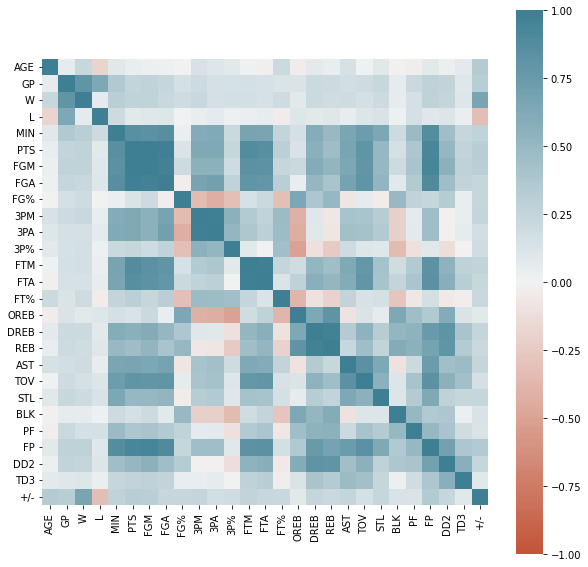

In [450]:
corrHeatMap(basicData)

hi:  4


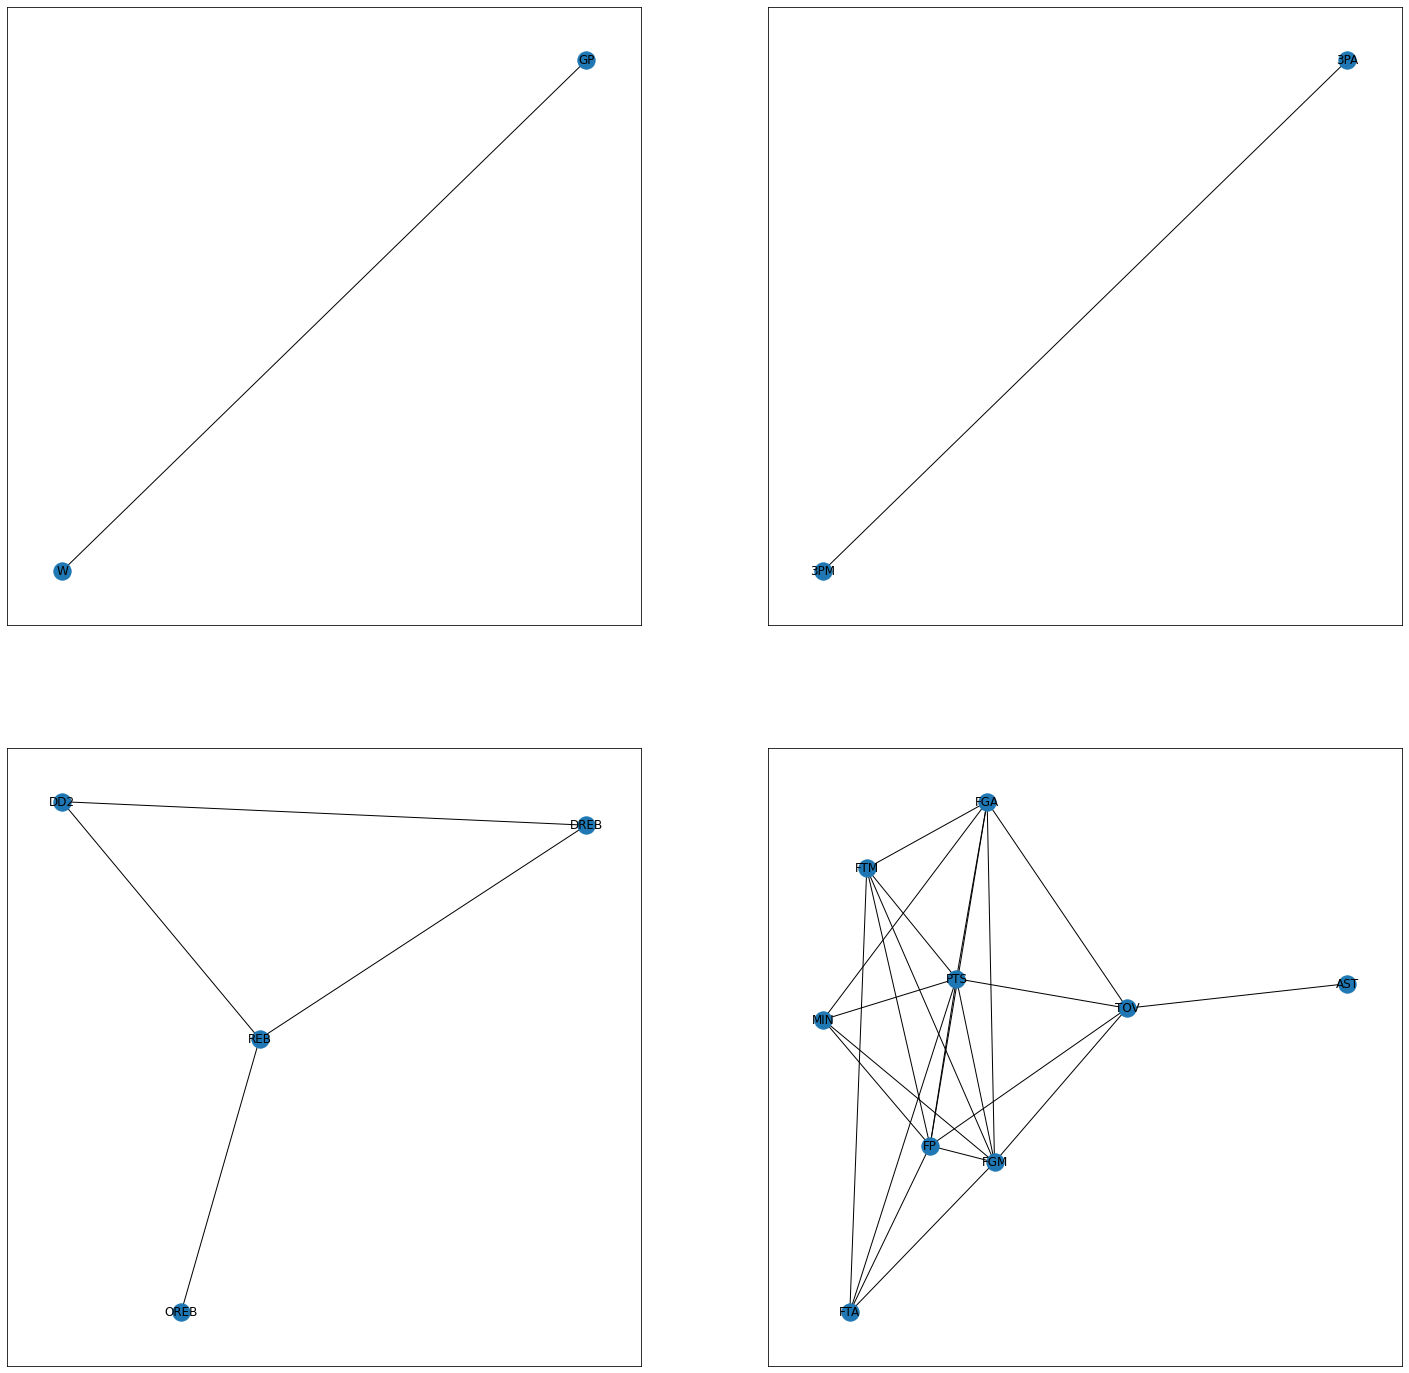

In [451]:
highCorrGraph(basicData)

<!-- - **GP**: Opponent Fast Break Points
- **W**: Opponent Points Off Turnovers
- **L**: Opponent 2nd Chance Points
- **MIN**: Opponent Points in Paint
- **PTS**: Minutes
- **FGM**: The percentage of team's defensive rebounds that a player has while on court
- **FGA%**: The percentage of available defensive rebounds a player or team obtains while on the floor
- **%FG%**: Percent of Team's Blocks
- **BLK**: Number of Blocks -->

- **GP** Games Played 
- **W** Wins 
- **L** Losses 
- **MIN** Minutes Played 
- **FGM** Field Goals Made 
- **FGA** Field Goals Attempted 
- **FG%** Field Goal Percentage 
- **3PM** 3 Point Field Goals Made 
- **3PA** 3 Point Field Goals Attempted 
- **3P%** 3 Point Field Goals Percentage 
- **FTM** Free Throws Made 
- **FTA** Free Throws Attempted 
- **FT%** Free Throw Percentage 
- **PTS** Points
- **ORE** Offensive Rebounds 
- **DRE** Defensive Rebounds 
- **REB** Rebounds 
- **AST** Assists 
- **TOV** Turnovers 
- **STL** Steals 
- **BLK** Blocks 
- **PF** Personal Fouls 
- **FP** Fantasy Points 
- **DD2** Double doubles 
- **TD3** Triple doubles  
- **+/-** Plus Minus

In [452]:
to_drop.update(['GP', 'W', 'L','MIN','FGA','FTA','3PA','REB','DD2','TOV','FP'])
# Here we drop wins, lossess and games played as we are only interested in how the 
# players play. Whether they win or not may be depedant on their team and other factors.
checkData(basicData)

Shape: (397, 29)
Has Null: False


,Player,Team,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Stephen Curry,GSW,33,63,37,26,34.2,32.0,10.4,21.7,48.2,5.3,12.7,42.1,5.7,6.3,91.6,0.5,5.0,5.5,5.8,3.4,1.2,0.1,1.9,47.9,8,0,3.9
1,Bradley Beal,WAS,28,60,32,28,35.8,31.3,11.2,23.0,48.5,2.2,6.2,34.9,6.8,7.7,88.9,1.2,3.5,4.7,4.4,3.1,1.2,0.4,2.3,45.0,4,0,-0.1
2,Damian Lillard,POR,30,67,39,28,35.8,28.8,9.0,19.9,45.1,4.1,10.5,39.1,6.7,7.2,92.8,0.5,3.7,4.2,7.5,3.0,0.9,0.3,1.5,45.7,16,0,3.0
3,Joel Embiid,PHI,27,51,39,12,31.1,28.5,9.0,17.6,51.3,1.1,3.0,37.7,9.2,10.7,85.9,2.2,8.4,10.6,2.8,3.1,1.0,1.4,2.4,49.3,31,0,7.9
4,Giannis Antetokounmpo,MIL,26,61,40,21,33.0,28.1,10.3,18.0,56.9,1.1,3.6,30.3,6.5,9.5,68.5,1.6,9.4,11.0,5.9,3.4,1.2,1.2,2.8,53.9,41,7,6.7


**Dropped Columns**
- GP
- FP
- FTA
- REB
- TOV

In [453]:
checkData(advancedData)

Shape: (540, 24)
Has Null: False


,Unnamed: 0,PLAYER,TEAM,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TO Ratio,eFG%,TS%,USG%,PACE,PIE,POSS
0,0,Anthony Edwards,MIN,19,72,23,49,32.1,110.6,115.6,-5.0,14.2,1.32,12.4,2.3,12.1,7.0,9.4,48.8,52.3,26.4,102.71,9.4,"4,961"
1,1,Bojan Bogdanovic,UTA,32,72,52,20,30.8,116.8,107.3,9.5,9.1,1.06,10.4,1.8,9.9,6.0,9.8,53.6,58.8,22.5,99.94,9.4,"4,604"
2,2,Duncan Robinson,MIA,27,72,40,32,31.4,110.6,108.3,2.3,8.2,1.57,13.4,0.3,10.9,5.7,8.5,61.4,62.8,16.2,97.55,7.5,"4,602"
3,3,Dwayne Bacon,ORL,25,72,21,51,25.7,101.3,112.8,-11.4,8.0,2.02,9.9,1.5,10.2,5.6,4.9,44.3,49.0,19.3,100.39,6.9,"3,875"
4,4,Enes Freedom,POR,29,72,42,30,24.4,119.7,114.8,4.9,6.9,1.08,10.6,14.8,28.1,21.3,9.8,60.5,63.6,16.9,98.79,14.1,"3,607"


In [454]:
advancedData.drop("Unnamed: 0", axis=1, inplace=True)
advancedData = dropPlayers(advancedData)
advancedData = advancedData.rename(columns={'PLAYER': 'Player','TEAM':'Team'})

checkData(advancedData)

Shape: (397, 23)
Has Null: False


,Player,Team,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TO Ratio,eFG%,TS%,USG%,PACE,PIE,POSS
0,Anthony Edwards,MIN,19,72,23,49,32.1,110.6,115.6,-5.0,14.2,1.32,12.4,2.3,12.1,7.0,9.4,48.8,52.3,26.4,102.71,9.4,"4,961"
1,Bojan Bogdanovic,UTA,32,72,52,20,30.8,116.8,107.3,9.5,9.1,1.06,10.4,1.8,9.9,6.0,9.8,53.6,58.8,22.5,99.94,9.4,"4,604"
2,Duncan Robinson,MIA,27,72,40,32,31.4,110.6,108.3,2.3,8.2,1.57,13.4,0.3,10.9,5.7,8.5,61.4,62.8,16.2,97.55,7.5,"4,602"
3,Dwayne Bacon,ORL,25,72,21,51,25.7,101.3,112.8,-11.4,8.0,2.02,9.9,1.5,10.2,5.6,4.9,44.3,49.0,19.3,100.39,6.9,"3,875"
4,Enes Freedom,POR,29,72,42,30,24.4,119.7,114.8,4.9,6.9,1.08,10.6,14.8,28.1,21.3,9.8,60.5,63.6,16.9,98.79,14.1,"3,607"


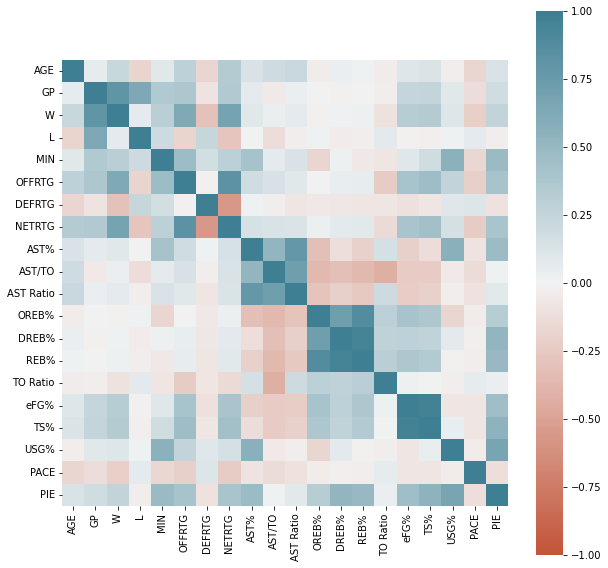

In [455]:
corrHeatMap(advancedData)

hi:  4


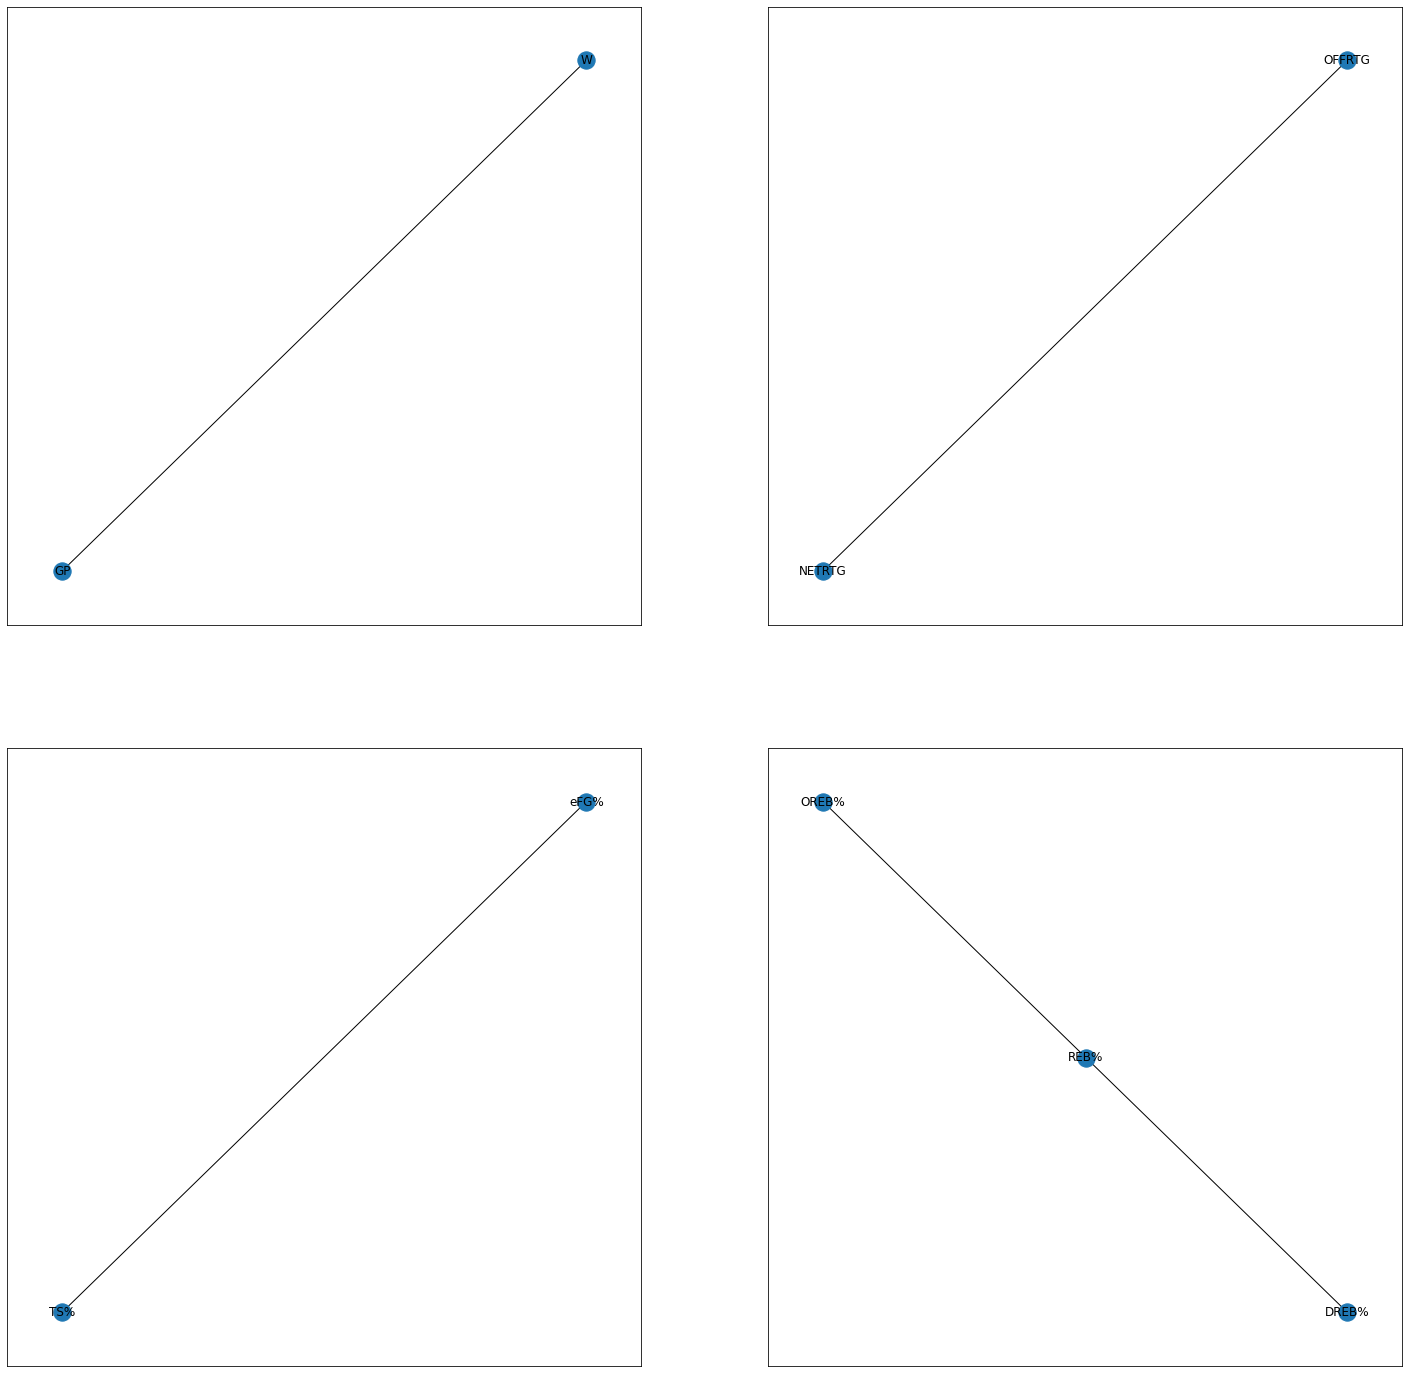

In [456]:
highCorrGraph(advancedData)

In [457]:
to_drop.update(['REB%','GP','OFFRTG','TS%'])
checkData(advancedData)

Shape: (397, 23)
Has Null: False


,Player,Team,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TO Ratio,eFG%,TS%,USG%,PACE,PIE,POSS
0,Anthony Edwards,MIN,19,72,23,49,32.1,110.6,115.6,-5.0,14.2,1.32,12.4,2.3,12.1,7.0,9.4,48.8,52.3,26.4,102.71,9.4,"4,961"
1,Bojan Bogdanovic,UTA,32,72,52,20,30.8,116.8,107.3,9.5,9.1,1.06,10.4,1.8,9.9,6.0,9.8,53.6,58.8,22.5,99.94,9.4,"4,604"
2,Duncan Robinson,MIA,27,72,40,32,31.4,110.6,108.3,2.3,8.2,1.57,13.4,0.3,10.9,5.7,8.5,61.4,62.8,16.2,97.55,7.5,"4,602"
3,Dwayne Bacon,ORL,25,72,21,51,25.7,101.3,112.8,-11.4,8.0,2.02,9.9,1.5,10.2,5.6,4.9,44.3,49.0,19.3,100.39,6.9,"3,875"
4,Enes Freedom,POR,29,72,42,30,24.4,119.7,114.8,4.9,6.9,1.08,10.6,14.8,28.1,21.3,9.8,60.5,63.6,16.9,98.79,14.1,"3,607"


**Dropped Columns**
- REB%
- GP
- OFFRTG

In [458]:
checkData(defenseData)

Shape: (540, 21)
Has Null: False


,Unnamed: 0,Player,TEAM,AGE,GP,W,L,MIN,DEF RTG,DREB,DREB%,%DREB,STL,STL%,BLK,%BLK,OPPPTSOFFTOV,OPPPTS2NDCHANCE,OPPPTSFB,OPPPTSPAINT,DEFWS
0,0,Anthony Edwards,MIN,19,72,23,49,32.1,115.6,3.8,12.1,17.8,1.1,19.5,0.5,14.6,11.3,9.8,10.4,34.1,0.048
1,1,Bojan Bogdanovic,UTA,32,72,52,20,30.8,107.3,3.3,9.9,13.9,0.6,15.6,0.1,1.6,11.5,7.9,7.8,33.3,0.121
2,2,Duncan Robinson,MIA,27,72,40,32,31.4,108.3,3.4,10.9,15.6,0.6,11.7,0.3,11.0,10.6,7.8,6.7,26.8,0.113
3,3,Dwayne Bacon,ORL,25,72,21,51,25.7,112.8,2.7,10.2,14.2,0.6,16.9,0.1,3.1,8.0,5.9,7.6,26.2,0.060
4,4,Enes Freedom,POR,29,72,42,30,24.4,114.8,7.1,28.1,40.4,0.5,14.9,0.7,27.9,6.8,6.8,6.8,25.0,0.042


In [459]:
defenseData.drop("Unnamed: 0", axis=1, inplace=True)
defenseData = dropPlayers(defenseData)
defenseData = defenseData.rename(columns={'TEAM':'Team'})

checkData(defenseData)

Shape: (397, 20)
Has Null: False


,Player,Team,AGE,GP,W,L,MIN,DEF RTG,DREB,DREB%,%DREB,STL,STL%,BLK,%BLK,OPPPTSOFFTOV,OPPPTS2NDCHANCE,OPPPTSFB,OPPPTSPAINT,DEFWS
0,Anthony Edwards,MIN,19,72,23,49,32.1,115.6,3.8,12.1,17.8,1.1,19.5,0.5,14.6,11.3,9.8,10.4,34.1,0.048
1,Bojan Bogdanovic,UTA,32,72,52,20,30.8,107.3,3.3,9.9,13.9,0.6,15.6,0.1,1.6,11.5,7.9,7.8,33.3,0.121
2,Duncan Robinson,MIA,27,72,40,32,31.4,108.3,3.4,10.9,15.6,0.6,11.7,0.3,11.0,10.6,7.8,6.7,26.8,0.113
3,Dwayne Bacon,ORL,25,72,21,51,25.7,112.8,2.7,10.2,14.2,0.6,16.9,0.1,3.1,8.0,5.9,7.6,26.2,0.060
4,Enes Freedom,POR,29,72,42,30,24.4,114.8,7.1,28.1,40.4,0.5,14.9,0.7,27.9,6.8,6.8,6.8,25.0,0.042


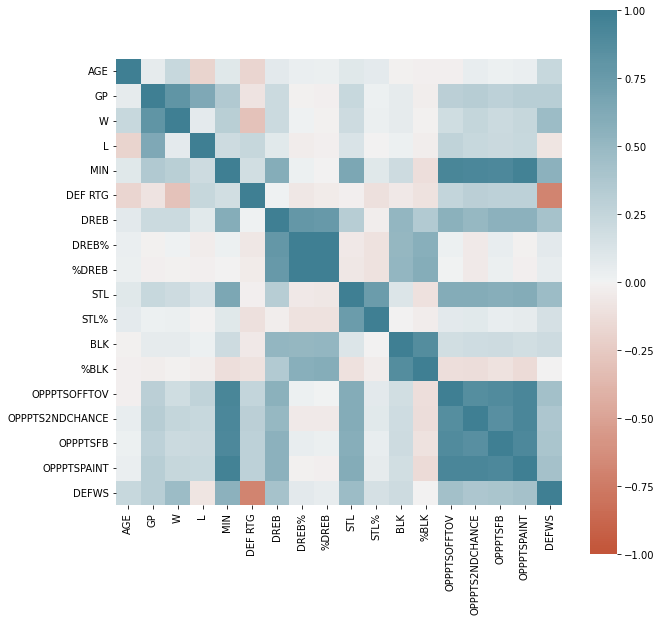

In [460]:
corrHeatMap(defenseData)

hi:  4


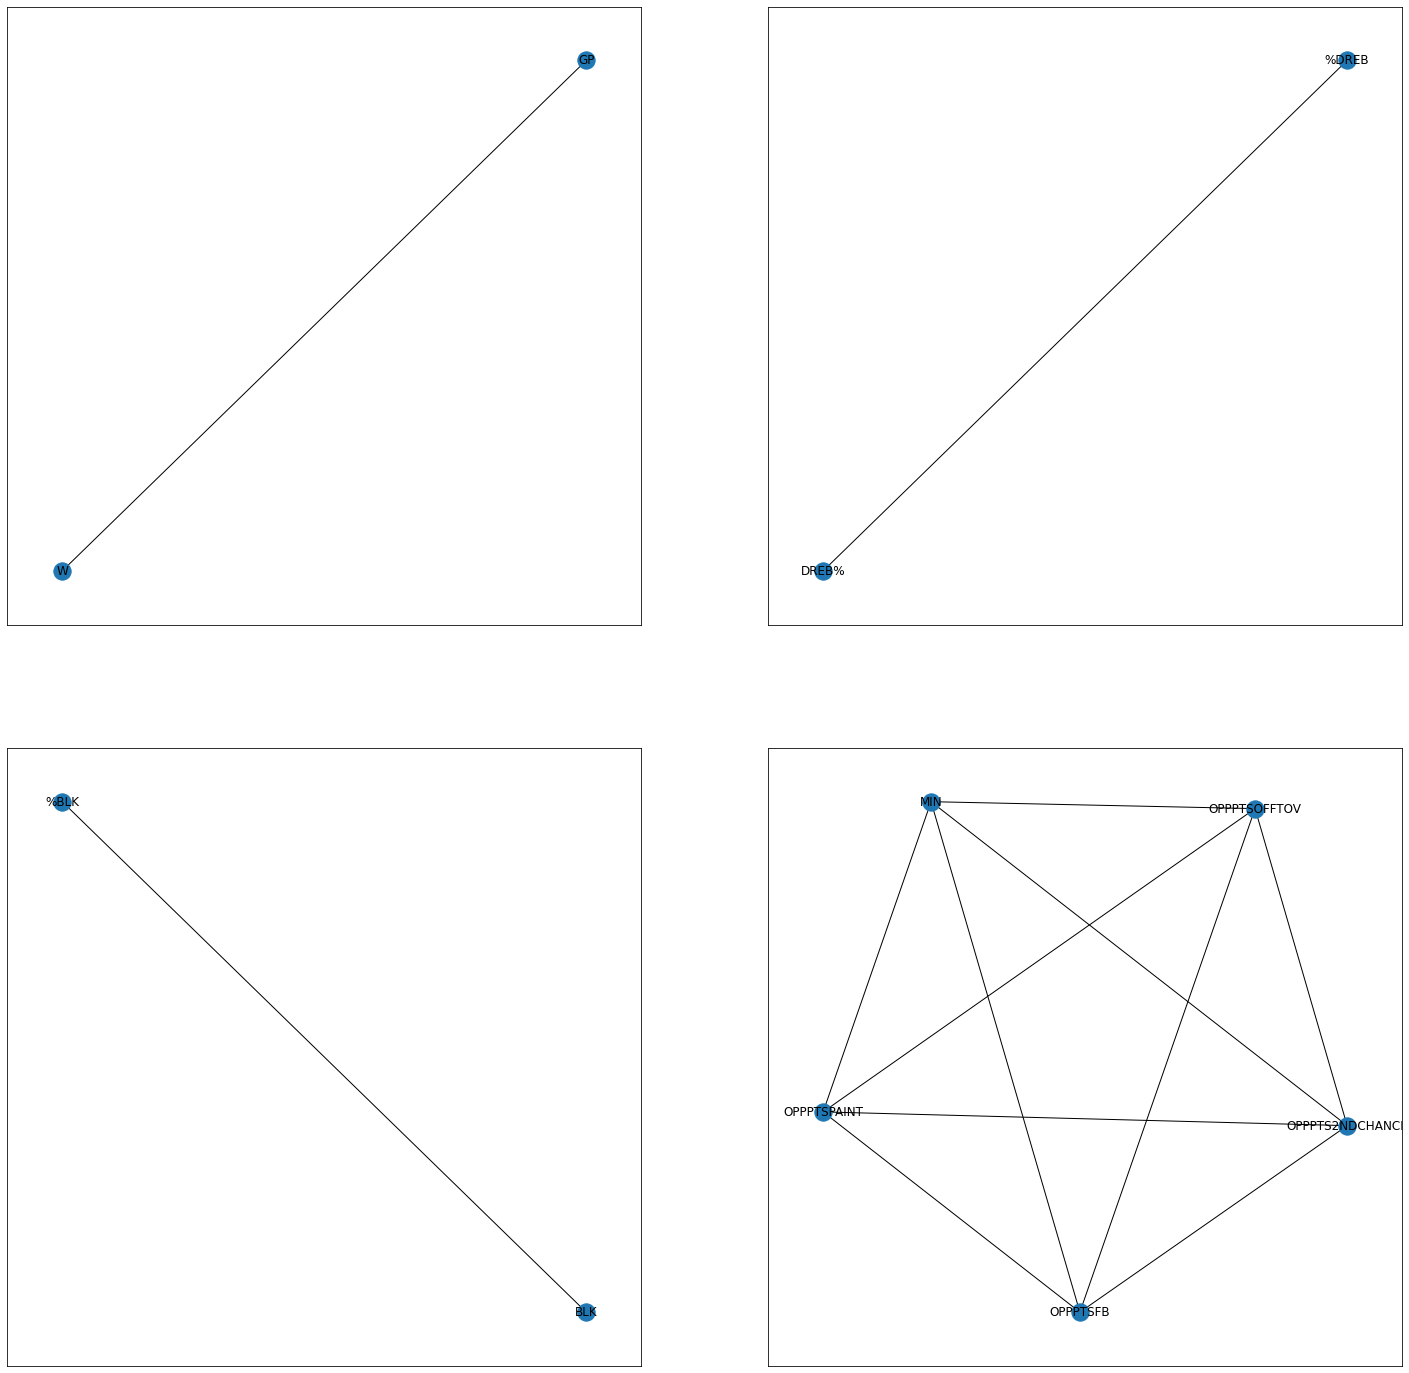

In [461]:
highCorrGraph(defenseData)

- **OPP PTSFB**: Opponent Fast Break Points
- **OPP PTSOFF TOV**: Opponent Points Off Turnovers
- **OPP PTS2ND CHANCE**: Opponent 2nd Chance Points
- **OPP PTSPAINT**: Opponent Points in Paint
- **MIN**: Minutes
- **%DREB**: The percentage of team's defensive rebounds that a player has while on court
- **DREB%**: The percentage of available defensive rebounds a player or team obtains while on the floor
- **%BLK**: Percent of Team's Blocks
- **BLK**: Number of Blocks

In [462]:
to_drop.update(['GP','BLK','DREB','MIN','OPPPTS2NDCHANCE','OPPPTSFB'])
checkData(defenseData)


Shape: (397, 20)
Has Null: False


,Player,Team,AGE,GP,W,L,MIN,DEF RTG,DREB,DREB%,%DREB,STL,STL%,BLK,%BLK,OPPPTSOFFTOV,OPPPTS2NDCHANCE,OPPPTSFB,OPPPTSPAINT,DEFWS
0,Anthony Edwards,MIN,19,72,23,49,32.1,115.6,3.8,12.1,17.8,1.1,19.5,0.5,14.6,11.3,9.8,10.4,34.1,0.048
1,Bojan Bogdanovic,UTA,32,72,52,20,30.8,107.3,3.3,9.9,13.9,0.6,15.6,0.1,1.6,11.5,7.9,7.8,33.3,0.121
2,Duncan Robinson,MIA,27,72,40,32,31.4,108.3,3.4,10.9,15.6,0.6,11.7,0.3,11.0,10.6,7.8,6.7,26.8,0.113
3,Dwayne Bacon,ORL,25,72,21,51,25.7,112.8,2.7,10.2,14.2,0.6,16.9,0.1,3.1,8.0,5.9,7.6,26.2,0.060
4,Enes Freedom,POR,29,72,42,30,24.4,114.8,7.1,28.1,40.4,0.5,14.9,0.7,27.9,6.8,6.8,6.8,25.0,0.042


**Dropped Columns**
- GP
- BLK
- DREB
- MIN

In [463]:
scoringData.drop("Unnamed: 0", axis=1, inplace=True)
scoringData = dropPlayers(scoringData)
scoringData = scoringData.rename(columns={'TEAM':'Team'})

checkData(scoringData)

Shape: (397, 22)
Has Null: False


,Player,Team,AGE,GP,W,L,MIN,%FGA2PT,%FGA3PT,%PTS2PT,%PTS2PT MR,%PTS3PT,%PTSFBPs,%PTSFT,%PTSOffTO,%PTSPITP,2FGM%AST,2FGM%UAST,3FGM%AST,3FGM%UAST,FGM%AST,FGM%UAST
0,Anthony Edwards,MIN,19,72,23,49,32.1,57.1,42.9,48.0,4.5,36.9,11.1,15.1,15.5,43.5,39.2,60.8,63.2,36.8,47.3,52.7
1,Bojan Bogdanovic,UTA,32,72,52,20,30.8,50.2,49.8,36.9,3.4,44.1,13.5,19.0,13.6,33.5,41.2,58.8,96.1,3.9,65.5,34.5
2,Duncan Robinson,MIA,27,72,40,32,31.4,14.5,85.5,13.8,1.1,79.6,10.3,6.6,17.2,12.7,89.2,10.8,97.2,2.8,95.6,4.4
3,Dwayne Bacon,ORL,25,72,21,51,25.7,71.5,28.5,59.1,10.9,22.5,17.9,18.4,14.2,48.2,40.8,59.2,59.3,40.7,44.5,55.5
4,Enes Freedom,POR,29,72,42,30,24.4,99.3,0.7,83.9,0.2,0.4,4.0,15.7,10.7,83.6,45.9,54.1,100.0,0.0,46.0,54.0


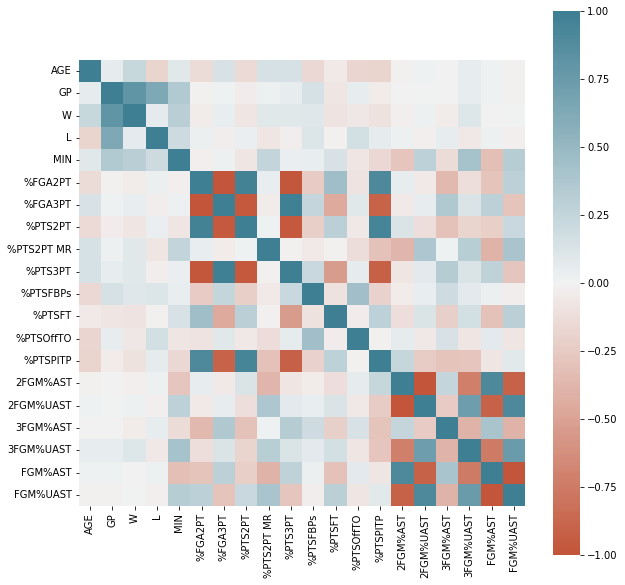

In [464]:
corrHeatMap(scoringData)

hi:  3


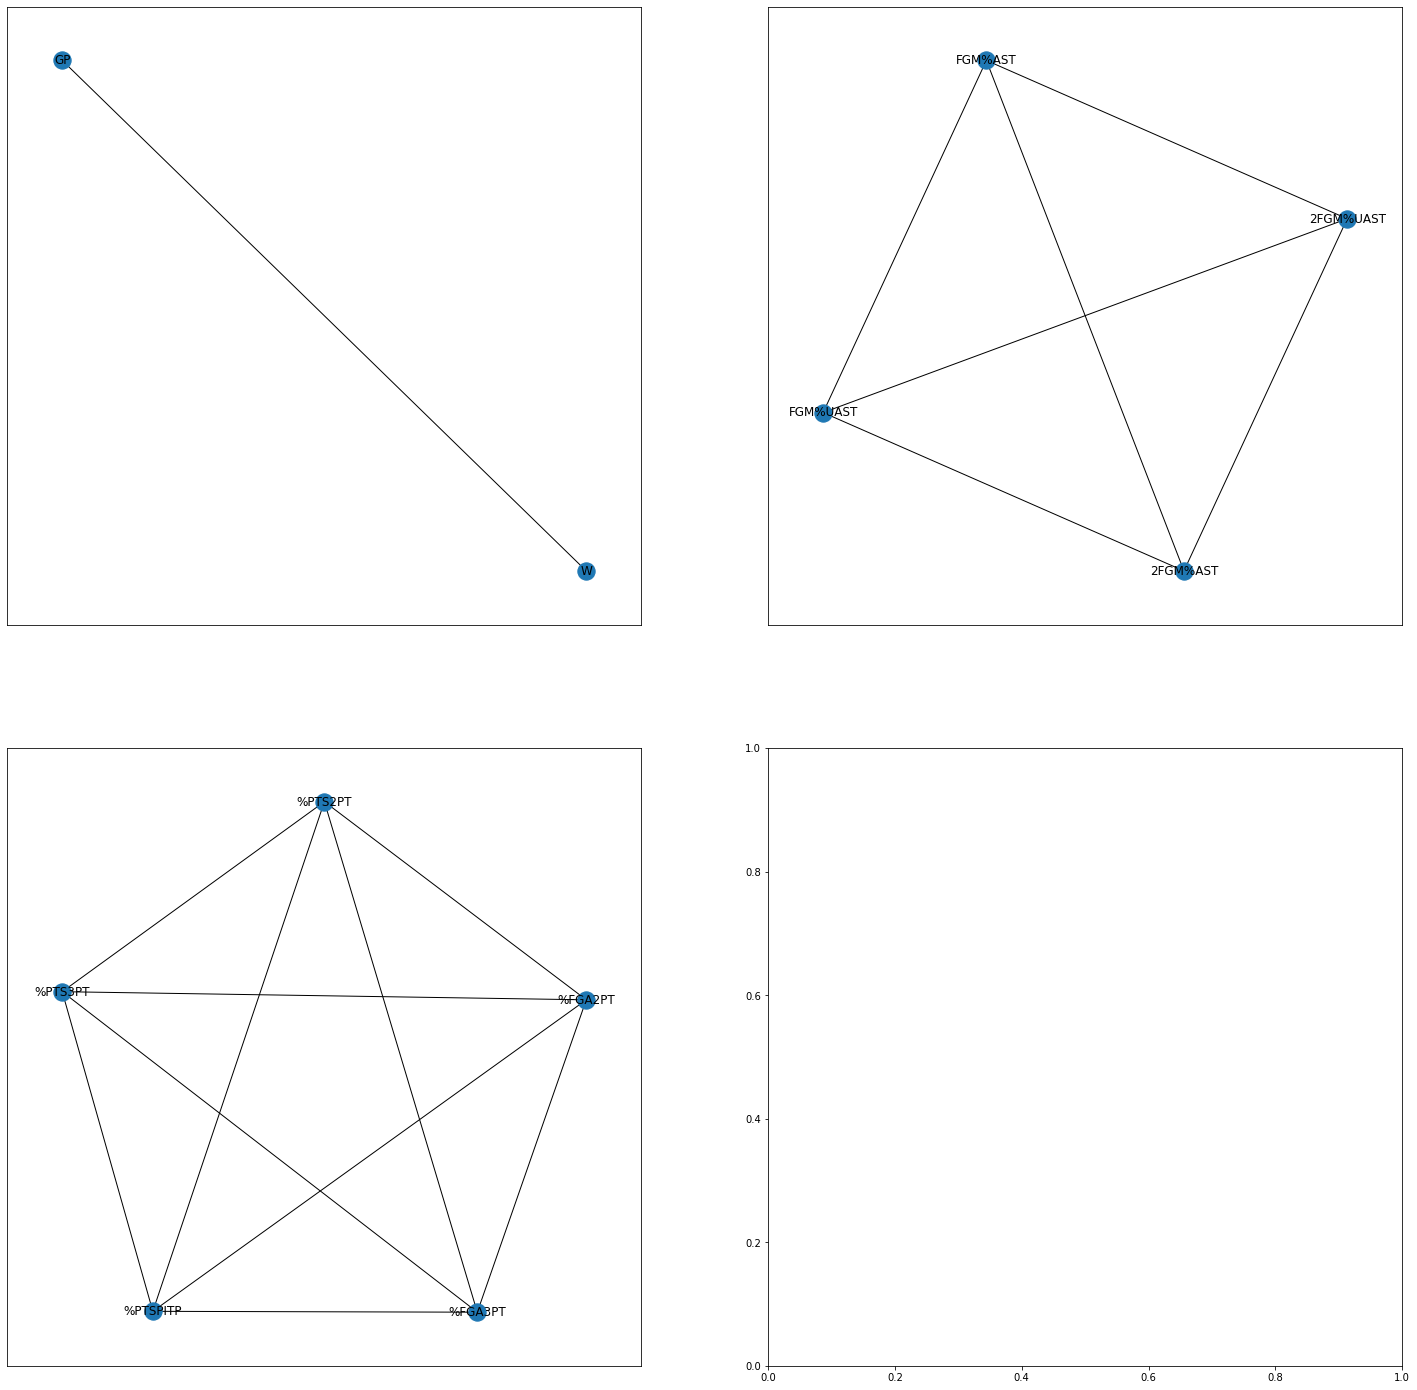

In [465]:
highCorrGraph(scoringData)

- **%PTS3PT**: Percent of 3 Pointers
- **%PTS2PT**: Percent of 2 Pointers
- **%FGA3PT**: Percent of Field Goals Attempted (3 PT)
- **%FGA2PT**: Percent of Field Goals Attempted (2 PT)
- **%PTSPITP**: Percent of of Points in the Paint

- **2FGM%UAST**: Percent of 2 PT Field Goals Unassisted
- **FGM%UAST**: Percent of PT Field Goals Unassisted
- **2FGM%AST**: Percent of 2 PT Field Goals Assisted
- **FGM%AST**: Percent of PT Field Goals Assisted

In [466]:
to_drop.update(['GP','MIN','%PTS3PT','%PTS2PT','%PTSPITP','2FGM%AST','2FGM%UAST'])
checkData(scoringData)

Shape: (397, 22)
Has Null: False


,Player,Team,AGE,GP,W,L,MIN,%FGA2PT,%FGA3PT,%PTS2PT,%PTS2PT MR,%PTS3PT,%PTSFBPs,%PTSFT,%PTSOffTO,%PTSPITP,2FGM%AST,2FGM%UAST,3FGM%AST,3FGM%UAST,FGM%AST,FGM%UAST
0,Anthony Edwards,MIN,19,72,23,49,32.1,57.1,42.9,48.0,4.5,36.9,11.1,15.1,15.5,43.5,39.2,60.8,63.2,36.8,47.3,52.7
1,Bojan Bogdanovic,UTA,32,72,52,20,30.8,50.2,49.8,36.9,3.4,44.1,13.5,19.0,13.6,33.5,41.2,58.8,96.1,3.9,65.5,34.5
2,Duncan Robinson,MIA,27,72,40,32,31.4,14.5,85.5,13.8,1.1,79.6,10.3,6.6,17.2,12.7,89.2,10.8,97.2,2.8,95.6,4.4
3,Dwayne Bacon,ORL,25,72,21,51,25.7,71.5,28.5,59.1,10.9,22.5,17.9,18.4,14.2,48.2,40.8,59.2,59.3,40.7,44.5,55.5
4,Enes Freedom,POR,29,72,42,30,24.4,99.3,0.7,83.9,0.2,0.4,4.0,15.7,10.7,83.6,45.9,54.1,100.0,0.0,46.0,54.0


**Dropped Columns**
- GP
- L
- MIN
- %PTS3PT
- %PTS2PT
- FGM%AST
- FGM%UAST

In [467]:
to_drop

{'%PTS2PT',
 '%PTS3PT',
 '%PTSPITP',
 '2FGM%AST',
 '2FGM%UAST',
 '3PA',
 'BLK',
 'DD2',
 'DREB',
 'FGA',
 'FP',
 'FTA',
 'GP',
 'L',
 'MIN',
 'OFFRTG',
 'OPPPTS2NDCHANCE',
 'OPPPTSFB',
 'REB',
 'REB%',
 'TOV',
 'TS%',
 'W'}

**Tracking**
- catch-shoot
- defensive-impact
- defensive-rebounding
- drive-stats
- offensive-rebounding
- paint-touch
- passing
- pullup
- rebounding
- speed-distance
- touches
- trackin-post-ups

In [468]:
checkData(catchShootData)

Shape: (540, 13)
Has Null: False


,Unnamed: 0,Player,Team,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,eFG%
0,0,Aaron Gordon,DEN,50,27.7,2.7,1.0,2.5,39.0,0.8,2.2,37.6,55.7
1,1,Aaron Holiday,IND,66,17.8,2.4,0.8,2.1,38.7,0.8,2.0,39.3,58.0
2,2,Aaron Nesmith,BOS,46,14.5,2.4,0.8,2.0,39.8,0.8,2.0,39.8,59.7
3,3,Abdel Nader,PHX,24,14.8,2.3,0.8,1.8,42.9,0.8,1.7,43.9,64.3
4,4,Adam Mokoka,CHI,14,4.0,0.2,0.1,0.6,12.5,0.1,0.6,12.5,18.8


In [469]:
catchShootData.drop("Unnamed: 0", axis=1, inplace=True)
catchShootData = dropPlayers(catchShootData)
catchShootData = catchShootData.rename(columns={'PTS':'C&SPTS','FGM':'C&SFGM','FGA':'C&SFGA','FG%':'C&SFG%','3PM':'C&S3PM','3PA':'C&S3PA','3P%':'C&S3P%','eFG%':'C&SeFG%'})
checkData(catchShootData)

Shape: (397, 12)
Has Null: False


,Player,Team,GP,MIN,C&SPTS,C&SFGM,C&SFGA,C&SFG%,C&S3PM,C&S3PA,C&S3P%,C&SeFG%
0,Aaron Gordon,DEN,50,27.7,2.7,1.0,2.5,39.0,0.8,2.2,37.6,55.7
1,Aaron Holiday,IND,66,17.8,2.4,0.8,2.1,38.7,0.8,2.0,39.3,58.0
2,Aaron Nesmith,BOS,46,14.5,2.4,0.8,2.0,39.8,0.8,2.0,39.8,59.7
3,Abdel Nader,PHX,24,14.8,2.3,0.8,1.8,42.9,0.8,1.7,43.9,64.3
5,Al Horford,BOS,28,27.9,5.8,2.0,5.6,36.1,1.7,4.7,36.6,51.3


In [470]:
catchShootData.dtypes

Player      object
Team        object
GP           int64
MIN        float64
C&SPTS     float64
C&SFGM     float64
C&SFGA     float64
C&SFG%      object
C&S3PM      object
C&S3PA      object
C&S3P%      object
C&SeFG%     object
dtype: object

In [471]:
cols = catchShootData.columns.drop(['Player','Team'])
catchShootData[cols] = catchShootData[cols].apply(pd.to_numeric, errors='coerce')

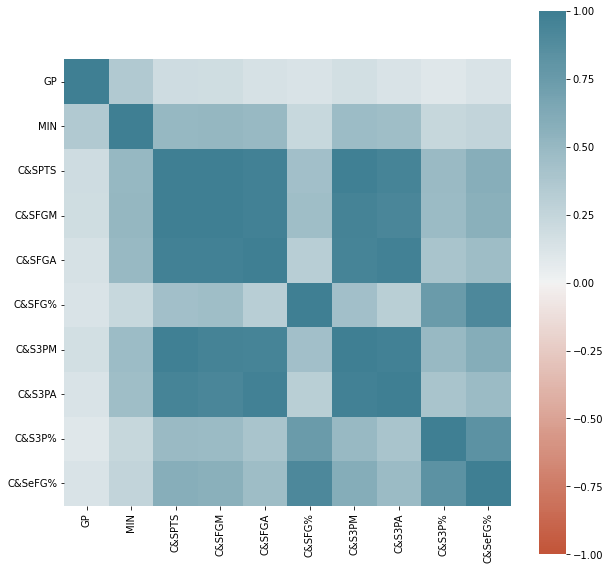

In [472]:
corrHeatMap(catchShootData)

hi:  2


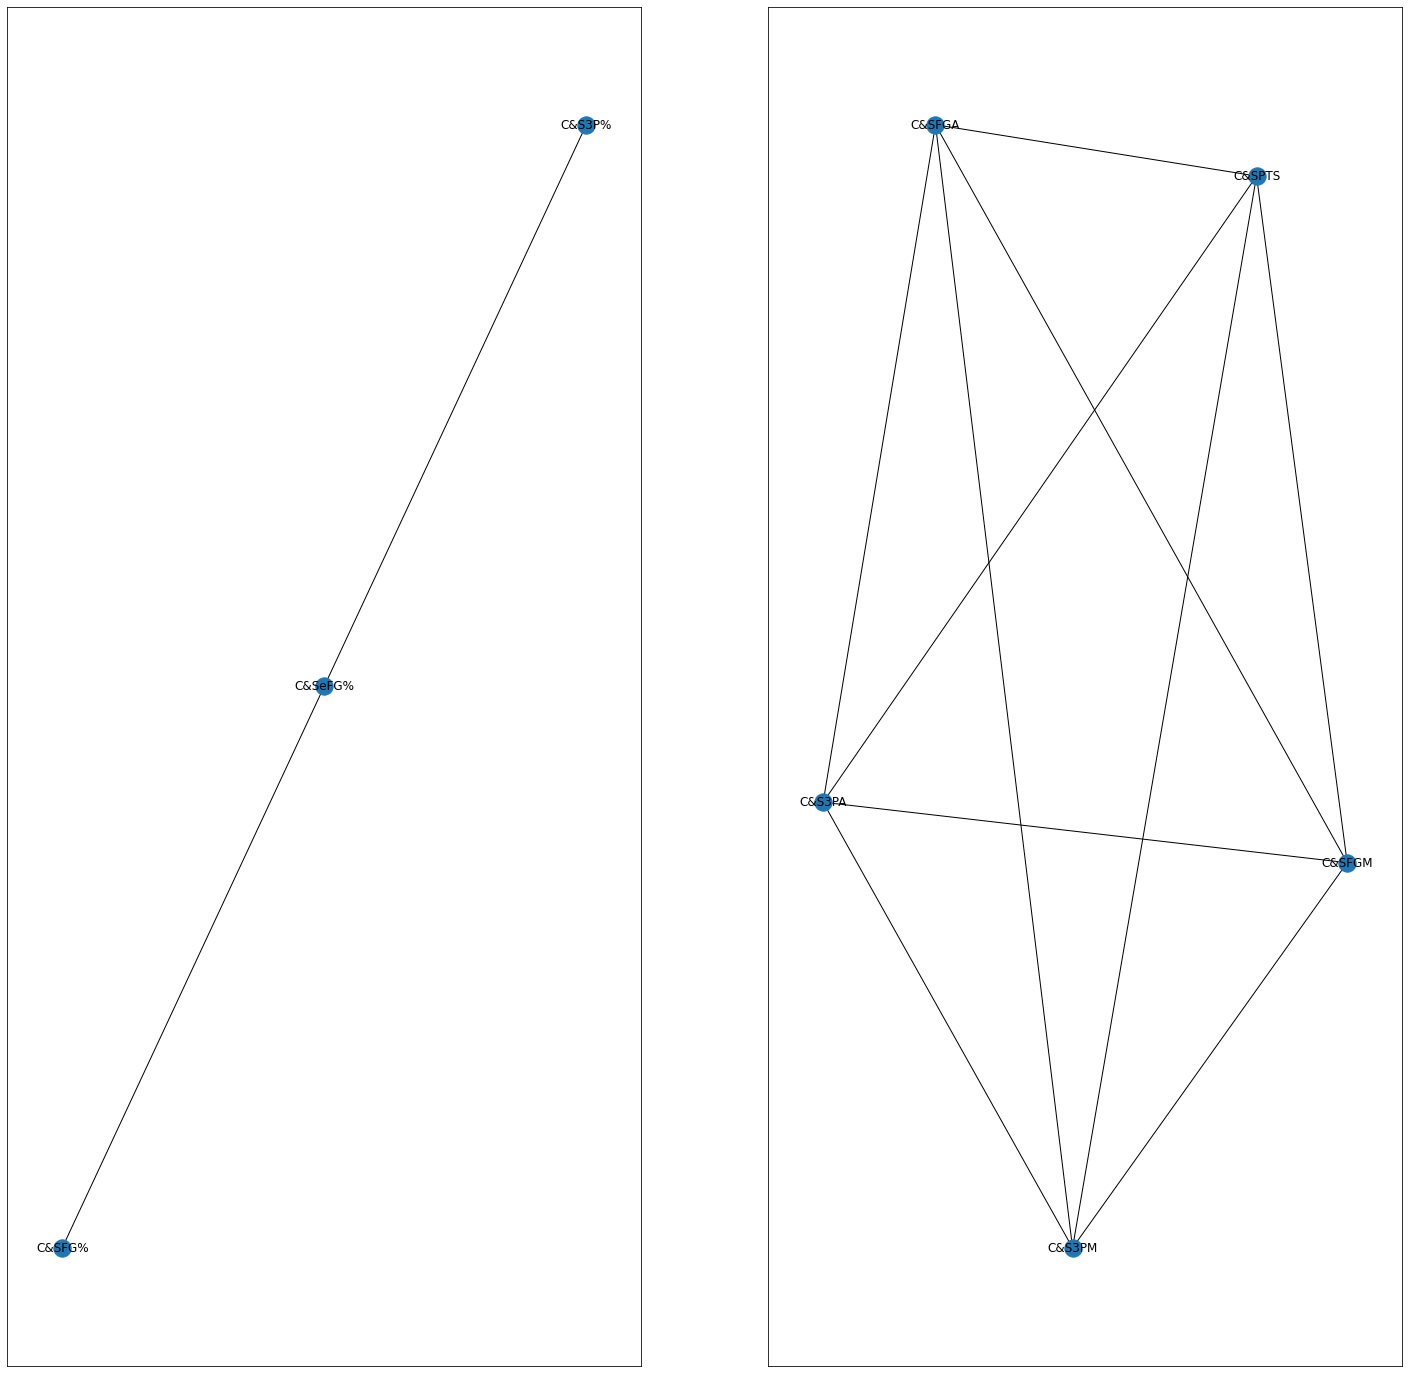

In [473]:
highCorrGraph(catchShootData)

In [474]:
to_drop.update(['C&SeFG%','C&SPTS','C&SFGA','C&S3PA'])

In [475]:
checkData(defensiveImpactData)

Shape: (540, 13)
Has Null: False


,Unnamed: 0,Player,Team,GP,MIN,W,L,STL,BLK,DREB,DFGM,DFGA,DFG%
0,0,Aaron Gordon,DEN,50,27.7,29,21,0.7,0.7,4.1,1.4,2.4,59.3
1,1,Aaron Holiday,IND,66,17.8,30,36,0.7,0.2,1.1,0.8,1.3,60.2
2,2,Aaron Nesmith,BOS,46,14.5,22,24,0.3,0.2,2.2,0.9,1.3,71.2
3,3,Abdel Nader,PHX,24,14.8,16,8,0.4,0.4,2.3,0.7,1.4,47.1
4,4,Adam Mokoka,CHI,14,4.0,3,11,0.1,0.1,0.3,0.1,0.1,50.0


In [476]:
defensiveImpactData.drop("Unnamed: 0", axis=1, inplace=True)
defensiveImpactData = dropPlayers(defensiveImpactData)
checkData(defensiveImpactData)

Shape: (397, 12)
Has Null: False


,Player,Team,GP,MIN,W,L,STL,BLK,DREB,DFGM,DFGA,DFG%
0,Aaron Gordon,DEN,50,27.7,29,21,0.7,0.7,4.1,1.4,2.4,59.3
1,Aaron Holiday,IND,66,17.8,30,36,0.7,0.2,1.1,0.8,1.3,60.2
2,Aaron Nesmith,BOS,46,14.5,22,24,0.3,0.2,2.2,0.9,1.3,71.2
3,Abdel Nader,PHX,24,14.8,16,8,0.4,0.4,2.3,0.7,1.4,47.1
5,Al Horford,BOS,28,27.9,11,17,0.9,0.9,5.7,2.5,4.2,60.7


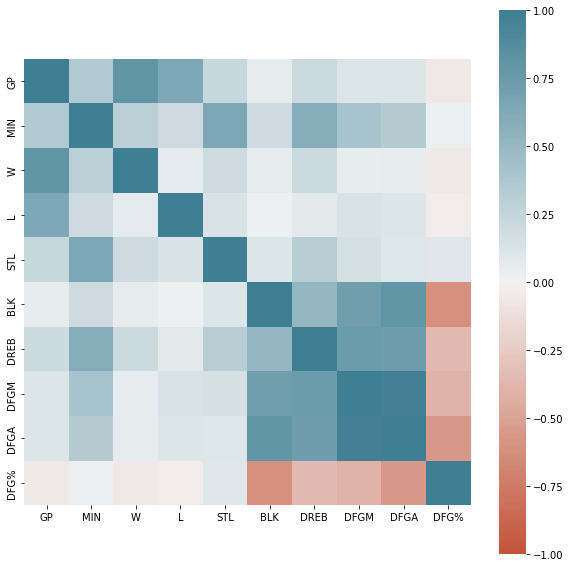

In [477]:
corrHeatMap(defensiveImpactData)

hi:  2


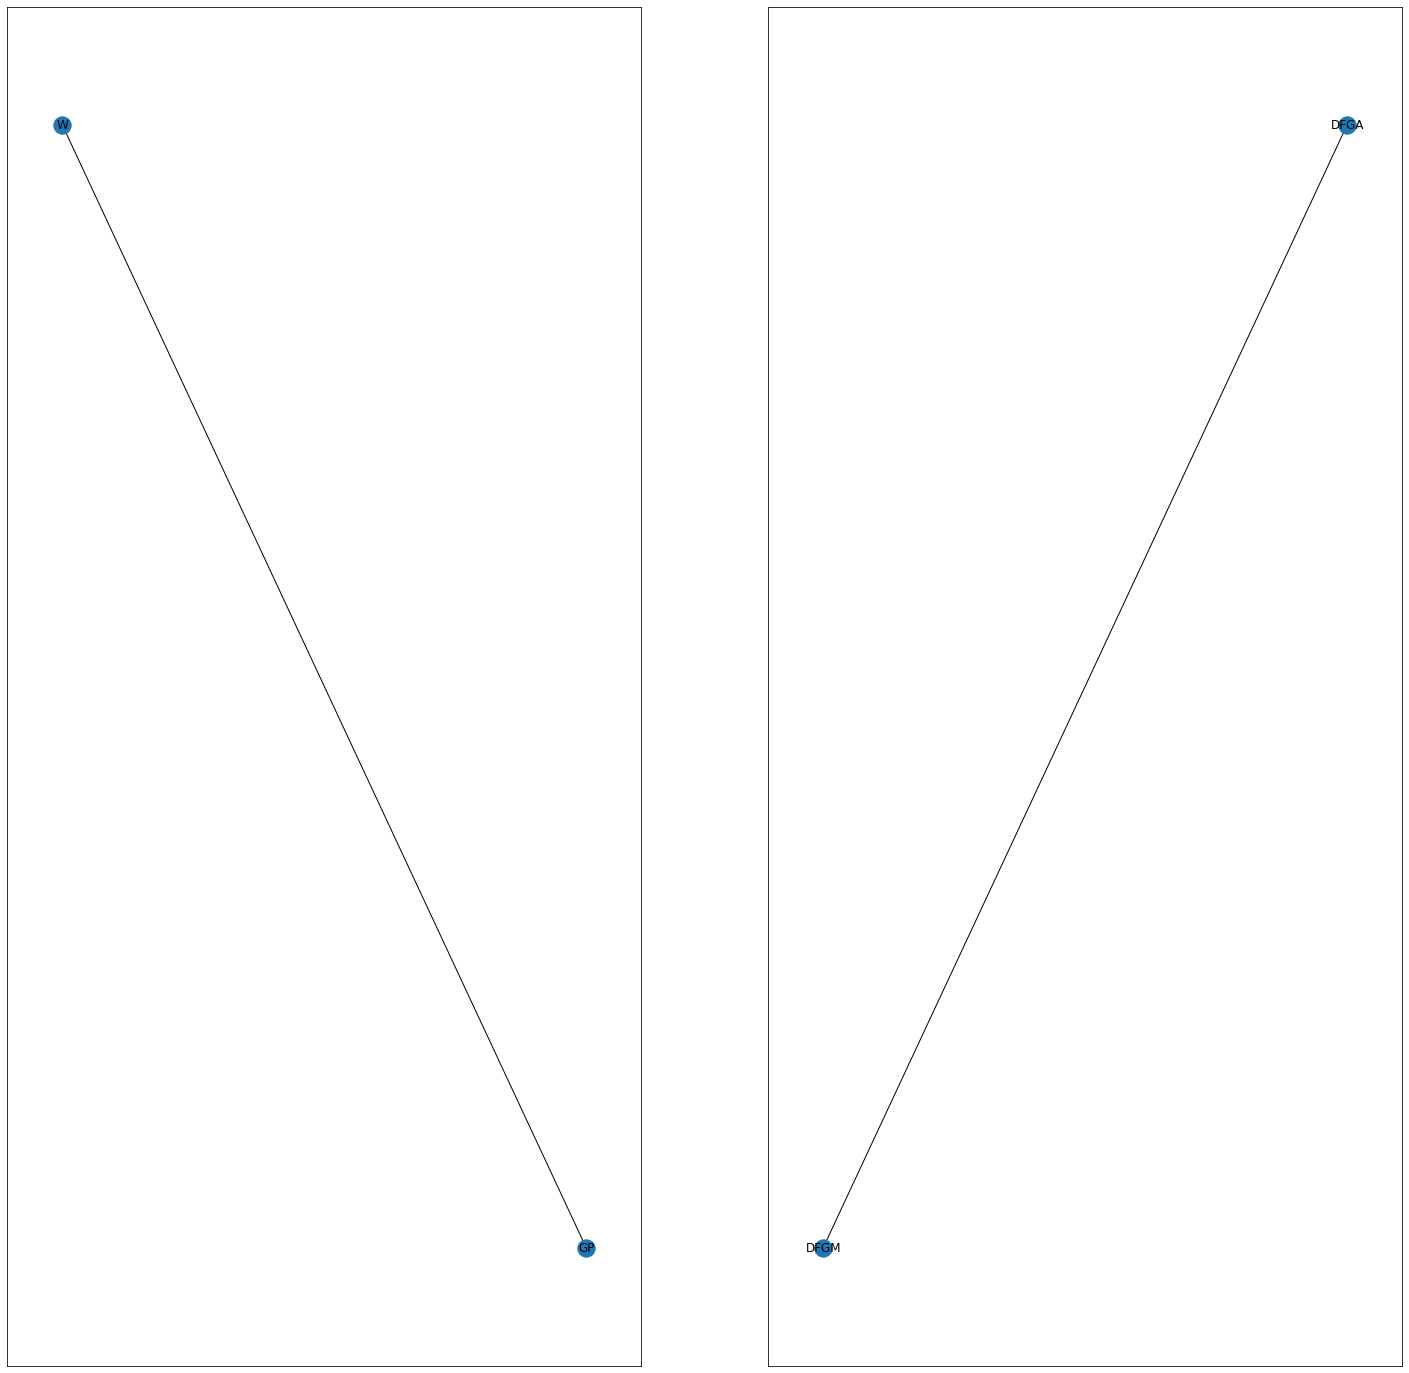

In [478]:
highCorrGraph(defensiveImpactData)

In [479]:
to_drop.update(['GP','DFGM'])

In [480]:
checkData(defensiveReboundingData)

Shape: (540, 15)
Has Null: False


,Unnamed: 0,Player,Team,GP,W,L,MIN,DREB,ContestedDREB,ContestedDREB%,DREBChances,DREBChance%,DeferredDREB Chances,AdjustedDREB Chance%,AVG DREBDistance
0,0,Aaron Gordon,DEN,50,29,21,27.7,4.1,1.1,27.1,5.8,71.6,0.5,78.1,6.3
1,1,Aaron Holiday,IND,66,30,36,17.8,1.1,0.1,5.4,1.8,60.7,0.2,69.8,9.2
2,2,Aaron Nesmith,BOS,46,22,24,14.5,2.2,0.6,27.3,3.4,63.9,0.3,69.2,6.2
3,3,Abdel Nader,PHX,24,16,8,14.8,2.3,0.4,18.2,3.3,68.8,0.4,78.6,6.3
4,4,Adam Mokoka,CHI,14,3,11,4.0,0.3,0.1,25.0,0.4,66.7,0.0,66.7,9.5


In [481]:
defensiveReboundingData.drop("Unnamed: 0", axis=1, inplace=True)
defensiveReboundingData = dropPlayers(defensiveReboundingData)
checkData(defensiveReboundingData)

Shape: (397, 14)
Has Null: False


,Player,Team,GP,W,L,MIN,DREB,ContestedDREB,ContestedDREB%,DREBChances,DREBChance%,DeferredDREB Chances,AdjustedDREB Chance%,AVG DREBDistance
0,Aaron Gordon,DEN,50,29,21,27.7,4.1,1.1,27.1,5.8,71.6,0.5,78.1,6.3
1,Aaron Holiday,IND,66,30,36,17.8,1.1,0.1,5.4,1.8,60.7,0.2,69.8,9.2
2,Aaron Nesmith,BOS,46,22,24,14.5,2.2,0.6,27.3,3.4,63.9,0.3,69.2,6.2
3,Abdel Nader,PHX,24,16,8,14.8,2.3,0.4,18.2,3.3,68.8,0.4,78.6,6.3
5,Al Horford,BOS,28,11,17,27.9,5.7,2.0,35.8,8.7,65.4,0.6,70.0,5.6


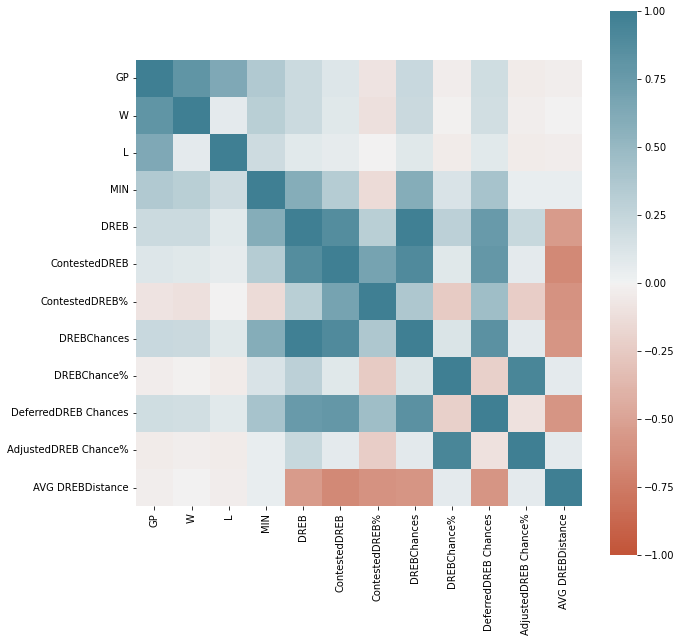

In [482]:
corrHeatMap(defensiveReboundingData)

hi:  3


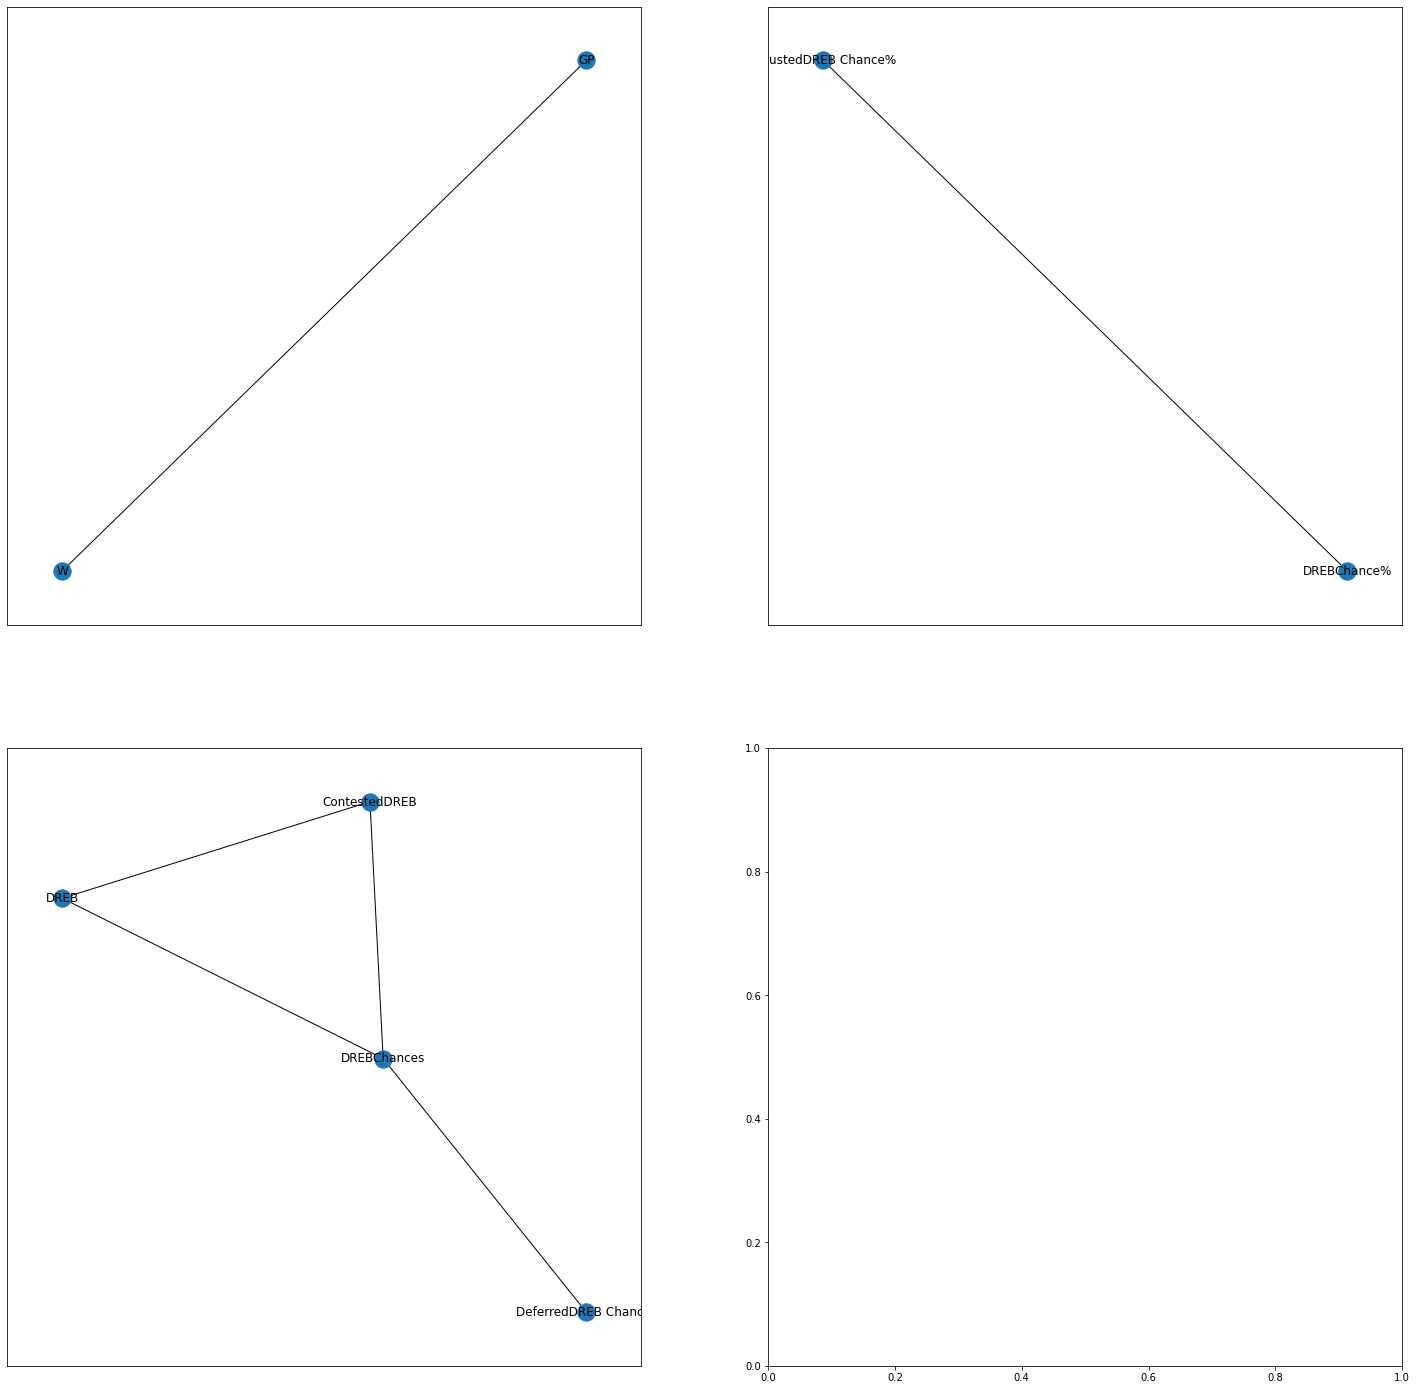

In [483]:
highCorrGraph(defensiveReboundingData)

In [484]:
to_drop.update(['DREBChances','ContestedDREB','DREBChance%','W'])

In [485]:
checkData(driveData)

Shape: (540, 24)
Has Null: False


,Unnamed: 0,Player,Team,GP,W,L,MIN,DRIVES,FGM,FGA,FG%,FTM,FTA,FT%,PTS,PTS%,PASS,PASS%,AST,AST%,TO,TOV%,PF,PF%
0,0,Aaron Gordon,DEN,50,29,21,27.7,4.6,0.8,1.8,43.3,0.5,0.8,61.5,2.0,44.7,1.7,36.4,0.4,8.3,0.4,8.3,0.4,8.8
1,1,Aaron Holiday,IND,66,30,36,17.8,5.8,0.9,2.5,35.9,0.4,0.5,81.3,2.2,38.1,2.4,41.8,0.6,10.2,0.4,7.6,0.2,4.2
2,2,Aaron Nesmith,BOS,46,22,24,14.5,1.6,0.3,0.6,42.9,0.2,0.3,66.7,0.7,45.2,0.7,41.1,0.2,9.6,0.1,8.2,0.1,8.2
3,3,Abdel Nader,PHX,24,16,8,14.8,3.5,0.8,1.6,52.6,0.3,0.5,58.3,2.0,57.8,1.1,31.3,0.3,9.6,0.3,9.6,0.3,7.2
4,4,Adam Mokoka,CHI,14,3,11,4.0,0.4,0.1,0.2,33.3,0.0,0.0,0.0,0.1,40.0,0.1,20.0,0.1,20.0,0.0,0.0,0.0,0.0


In [486]:
driveData.drop("Unnamed: 0", axis=1, inplace=True)
driveData = dropPlayers(driveData)
driveData = driveData.rename(columns={'DRIVES':'Drives','FGM':'DriveFGM','FGA':'DriveFGA','FG%':'DriveFG%','FTM':'DriveFTM','FTA':'DriveFTA','FT%':'DriveFT%','PTS':'DrivePTS','PTS%':'DrivePTS%','PASS':'DrivePASS','PASS%':'DrivePASS%','AST':'DriveAST','AST%':'DriveAST%','TO':'DriveTO','TOV':'DriveTOV','TOV%':'DriveTOV%','PF':'DrivePF','PF%':'DrivePF%'})
checkData(driveData)

Shape: (397, 23)
Has Null: False


,Player,Team,GP,W,L,MIN,Drives,DriveFGM,DriveFGA,DriveFG%,DriveFTM,DriveFTA,DriveFT%,DrivePTS,DrivePTS%,DrivePASS,DrivePASS%,DriveAST,DriveAST%,DriveTO,DriveTOV%,DrivePF,DrivePF%
0,Aaron Gordon,DEN,50,29,21,27.7,4.6,0.8,1.8,43.3,0.5,0.8,61.5,2.0,44.7,1.7,36.4,0.4,8.3,0.4,8.3,0.4,8.8
1,Aaron Holiday,IND,66,30,36,17.8,5.8,0.9,2.5,35.9,0.4,0.5,81.3,2.2,38.1,2.4,41.8,0.6,10.2,0.4,7.6,0.2,4.2
2,Aaron Nesmith,BOS,46,22,24,14.5,1.6,0.3,0.6,42.9,0.2,0.3,66.7,0.7,45.2,0.7,41.1,0.2,9.6,0.1,8.2,0.1,8.2
3,Abdel Nader,PHX,24,16,8,14.8,3.5,0.8,1.6,52.6,0.3,0.5,58.3,2.0,57.8,1.1,31.3,0.3,9.6,0.3,9.6,0.3,7.2
5,Al Horford,BOS,28,11,17,27.9,2.0,0.8,1.3,59.5,0.0,0.0,0.0,1.6,83.6,0.6,30.9,0.1,5.5,0.0,0.0,0.0,0.0


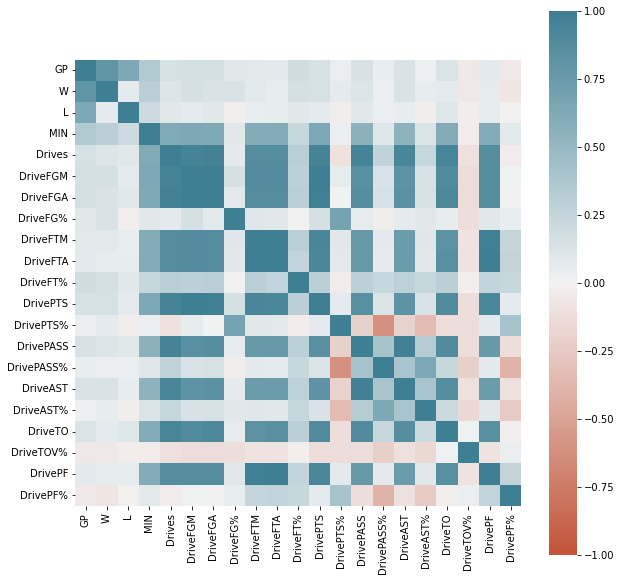

In [487]:
corrHeatMap(driveData)

hi:  2


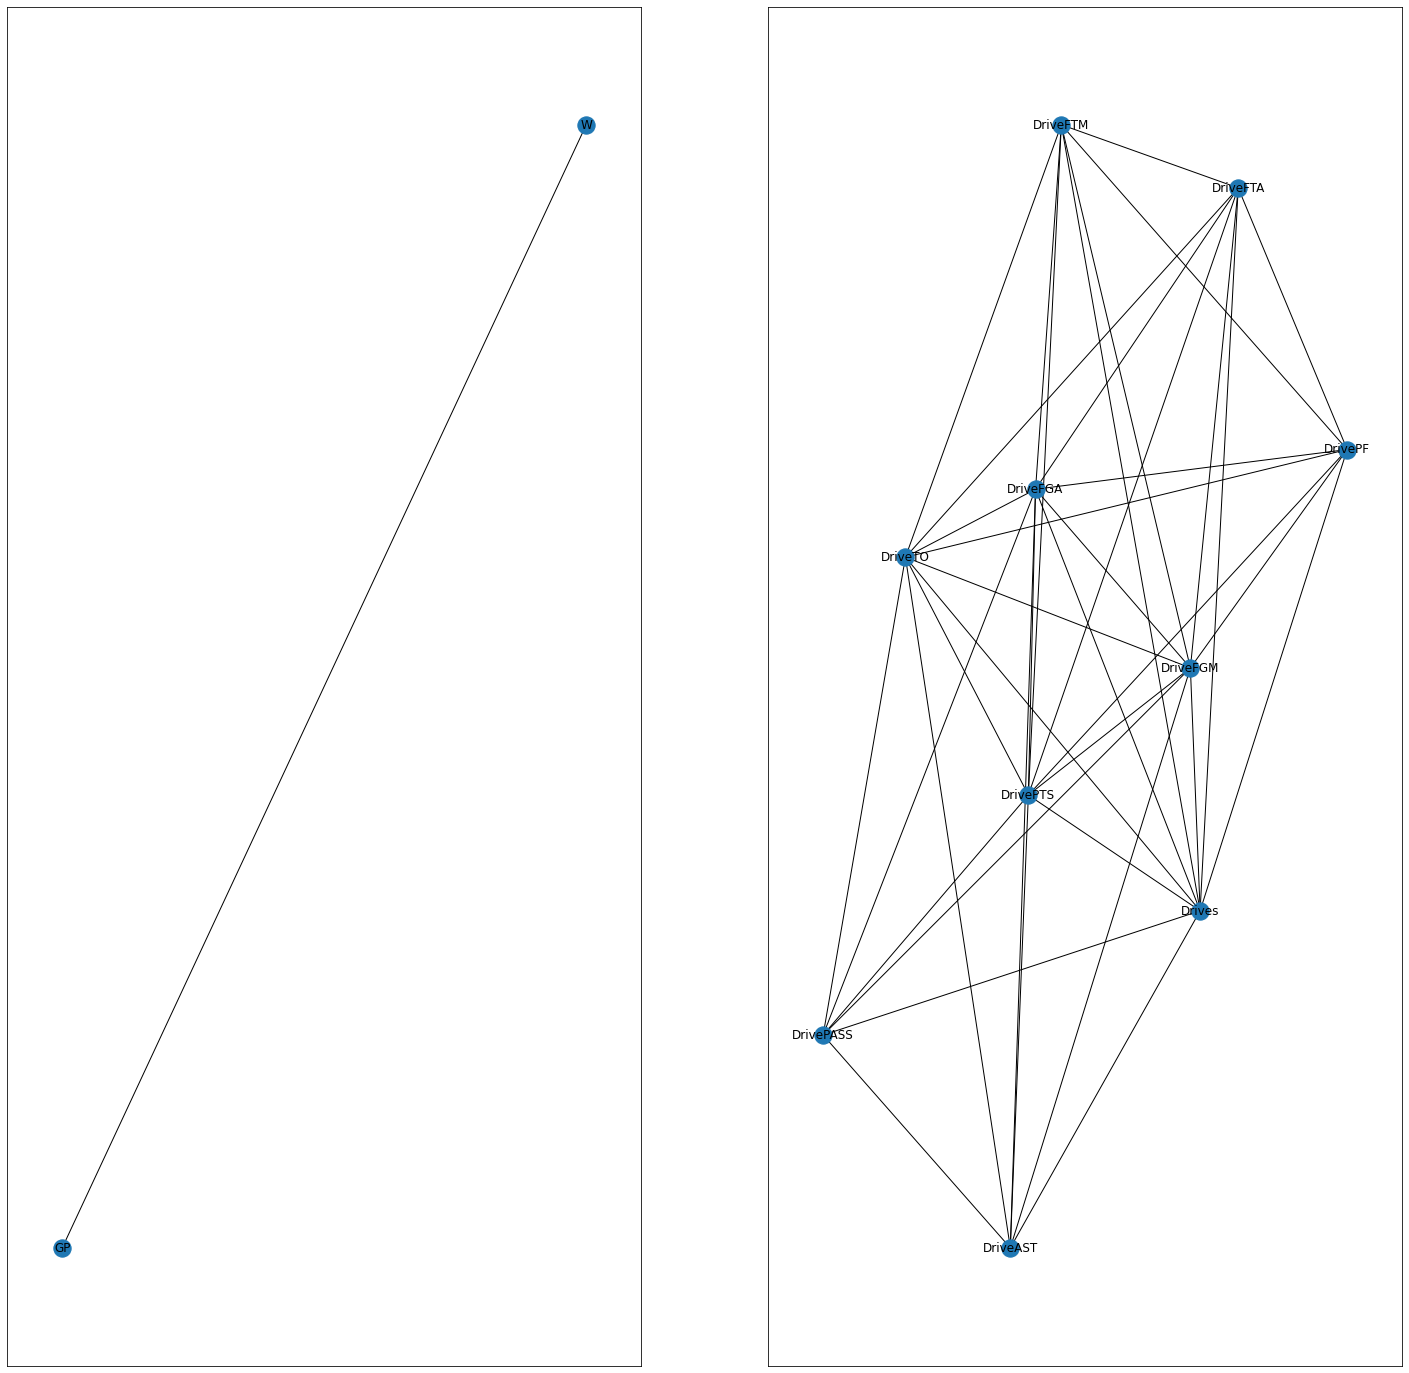

In [488]:
highCorrGraph(driveData)

In [489]:
to_drop.update(['DrivePF','DriveFGA','DrivePTS','DriveTO','DriveFTA','DrivePTS'])

In [490]:
checkData(offensiveReboundingData)

Shape: (540, 15)
Has Null: False


,Unnamed: 0,Player,Team,GP,W,L,MIN,OREB,ContestedOREB,ContestedOREB%,OREBChances,OREBChance%,DeferredOREB Chances,AdjustedOREB Chance%,AVG OREBDistance
0,0,Aaron Gordon,DEN,50,29,21,27.7,1.5,1.0,66.2,3.1,50.0,0.1,52.0,7.0
1,1,Aaron Holiday,IND,66,30,36,17.8,0.2,0.1,33.3,0.7,30.6,0.0,31.3,14.3
2,2,Aaron Nesmith,BOS,46,22,24,14.5,0.6,0.4,67.9,1.4,44.4,0.1,46.7,8.3
3,3,Abdel Nader,PHX,24,16,8,14.8,0.3,0.1,42.9,1.0,29.2,0.0,29.2,3.7
4,4,Adam Mokoka,CHI,14,3,11,4.0,0.1,0.1,100.0,0.2,33.3,0.0,33.3,7.3


In [491]:
offensiveReboundingData.drop("Unnamed: 0", axis=1, inplace=True)
offensiveReboundingData = dropPlayers(offensiveReboundingData)
checkData(offensiveReboundingData)

Shape: (397, 14)
Has Null: False


,Player,Team,GP,W,L,MIN,OREB,ContestedOREB,ContestedOREB%,OREBChances,OREBChance%,DeferredOREB Chances,AdjustedOREB Chance%,AVG OREBDistance
0,Aaron Gordon,DEN,50,29,21,27.7,1.5,1.0,66.2,3.1,50.0,0.1,52.0,7.0
1,Aaron Holiday,IND,66,30,36,17.8,0.2,0.1,33.3,0.7,30.6,0.0,31.3,14.3
2,Aaron Nesmith,BOS,46,22,24,14.5,0.6,0.4,67.9,1.4,44.4,0.1,46.7,8.3
3,Abdel Nader,PHX,24,16,8,14.8,0.3,0.1,42.9,1.0,29.2,0.0,29.2,3.7
5,Al Horford,BOS,28,11,17,27.9,1.0,0.5,44.8,2.8,37.7,0.0,37.7,7.9


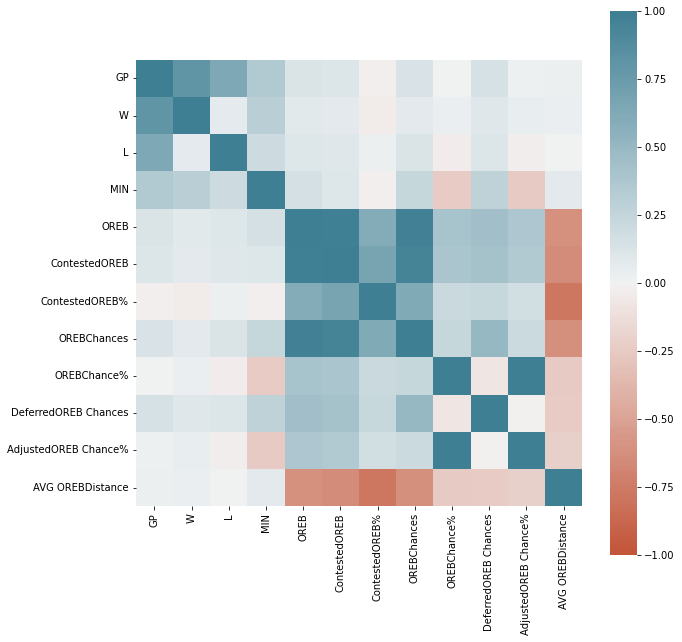

In [492]:
corrHeatMap(offensiveReboundingData)

hi:  3


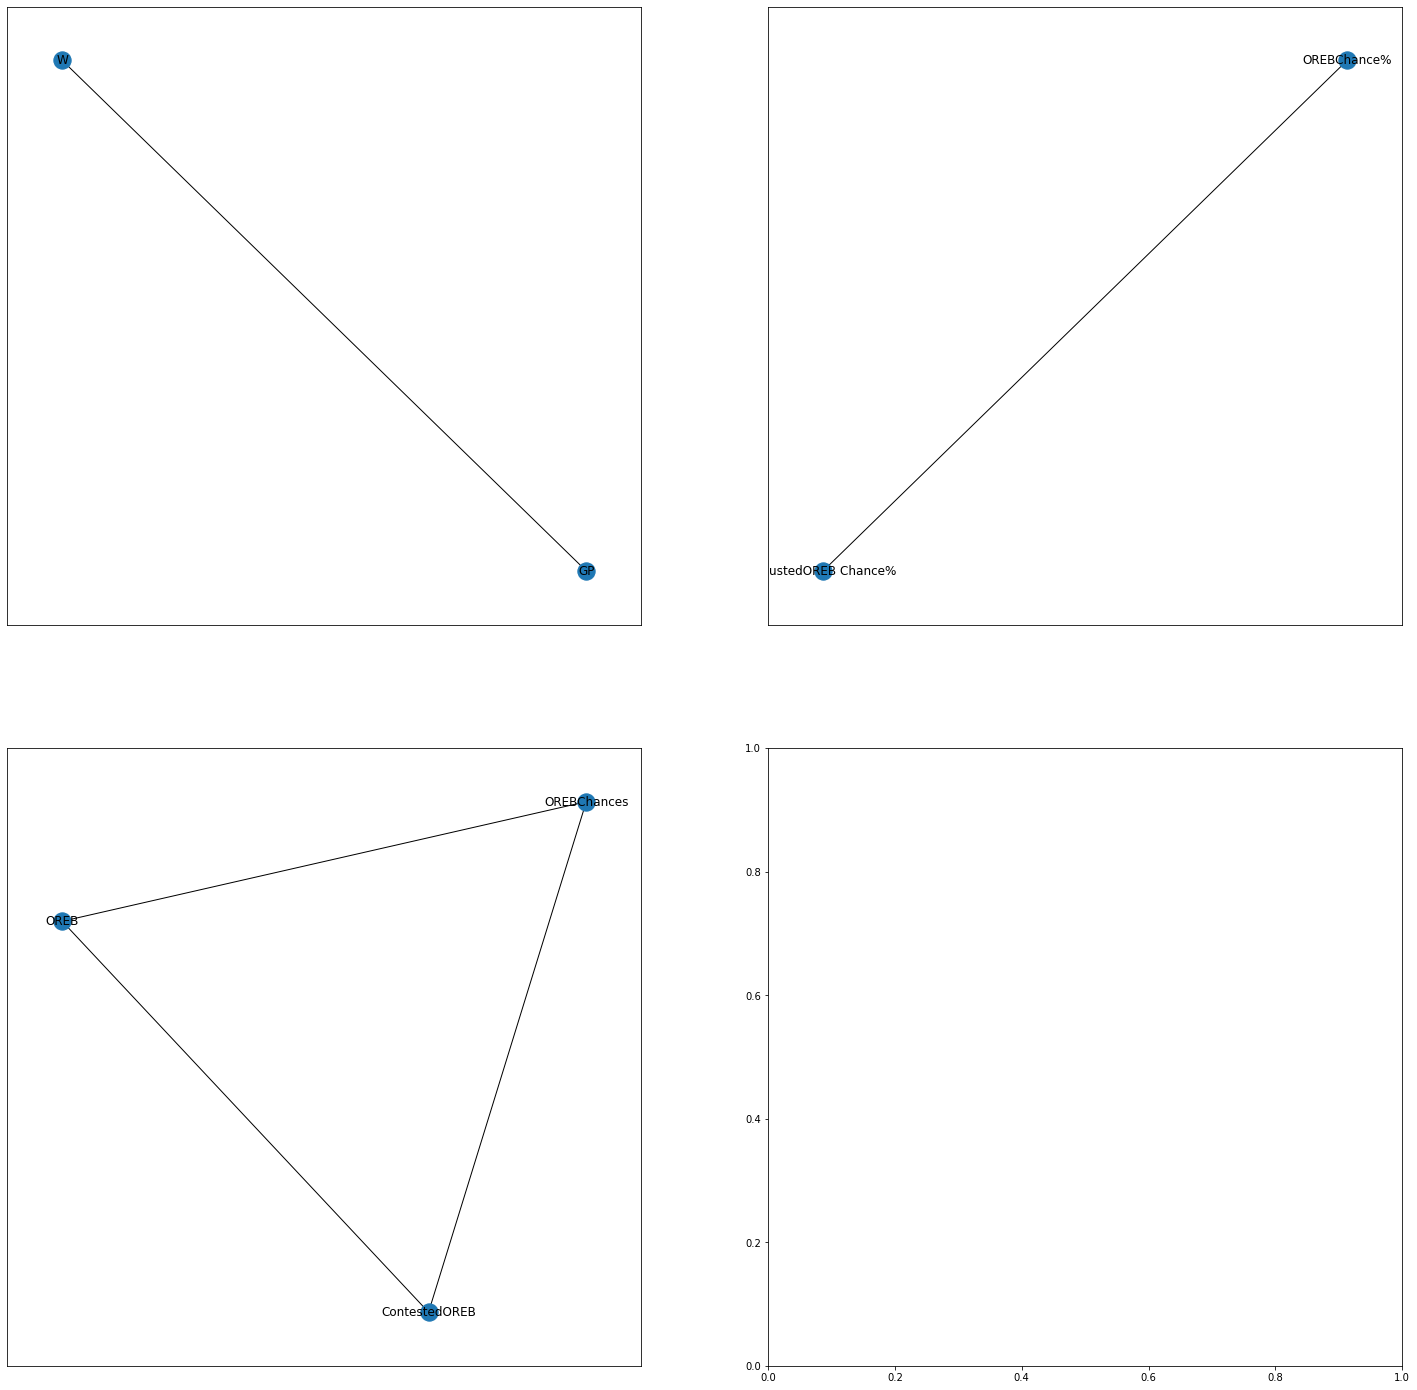

In [493]:
highCorrGraph(offensiveReboundingData)

In [494]:
to_drop.update(['OREBChance%','OREBChances','ContestedOREB'])

In [495]:
checkData(paintTouchData)

Shape: (540, 25)
Has Null: False


,Unnamed: 0,Player,Team,GP,W,L,MIN,Touches,PaintTouches,FGM,FGA,FG%,FTM,FTA,FT%,PTS,PTS%,Pass,Pass%,AST,AST%,TO,TOV%,PF,PF%
0,0,Aaron Gordon,DEN,50,29,21,27.7,48.3,3.8,1.6,2.4,68.6,0.3,0.5,61.5,3.6,93.8,0.8,21.4,0.3,6.8,0.2,4.7,0.3,6.8
1,1,Aaron Holiday,IND,66,30,36,17.8,24.5,0.3,0.1,0.2,50.0,0.0,0.1,75.0,0.2,59.1,0.1,22.7,0.0,4.5,0.1,18.2,0.0,9.1
2,2,Aaron Nesmith,BOS,46,22,24,14.5,16.7,0.7,0.3,0.4,84.2,0.0,0.0,0.0,0.7,97.0,0.2,21.2,0.0,0.0,0.1,15.2,0.0,0.0
3,3,Abdel Nader,PHX,24,16,8,14.8,16.2,0.7,0.3,0.5,63.6,0.2,0.3,83.3,0.8,117.6,0.1,11.8,0.0,5.9,0.0,5.9,0.1,17.6
4,4,Adam Mokoka,CHI,14,3,11,4.0,4.1,0.1,0.1,0.1,100.0,0.0,0.0,0.0,0.1,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [496]:
paintTouchData.drop("Unnamed: 0", axis=1, inplace=True)
paintTouchData = dropPlayers(paintTouchData)
paintTouchData = paintTouchData.rename(columns={'FGM':'PaintTouch FGM','FGA':'PaintTouch FGA','FG%':'PaintTouch FG%','FTM':'PaintTouch FTM','FTA':'PaintTouch FTA','FT%':'PaintTouch FT%','PTS':'PaintTouch PTS','PTS%':'PaintTouch PTS%','Pass':'PaintTouch PASS','Pass%':'PaintTouch PASS%','AST':'PaintTouch AST','AST%':'PaintTouch AST%','TO': 'PaintTouch TO','TOV':'PaintTouch TOV','TOV%':'PaintTouch TOV%','PF': 'PaintTouch PF','PF%':'PaintTouch PF%'})
checkData(paintTouchData)

Shape: (397, 24)
Has Null: False


,Player,Team,GP,W,L,MIN,Touches,PaintTouches,PaintTouch FGM,PaintTouch FGA,PaintTouch FG%,PaintTouch FTM,PaintTouch FTA,PaintTouch FT%,PaintTouch PTS,PaintTouch PTS%,PaintTouch PASS,PaintTouch PASS%,PaintTouch AST,PaintTouch AST%,PaintTouch TO,PaintTouch TOV%,PaintTouch PF,PaintTouch PF%
0,Aaron Gordon,DEN,50,29,21,27.7,48.3,3.8,1.6,2.4,68.6,0.3,0.5,61.5,3.6,93.8,0.8,21.4,0.3,6.8,0.2,4.7,0.3,6.8
1,Aaron Holiday,IND,66,30,36,17.8,24.5,0.3,0.1,0.2,50.0,0.0,0.1,75.0,0.2,59.1,0.1,22.7,0.0,4.5,0.1,18.2,0.0,9.1
2,Aaron Nesmith,BOS,46,22,24,14.5,16.7,0.7,0.3,0.4,84.2,0.0,0.0,0.0,0.7,97.0,0.2,21.2,0.0,0.0,0.1,15.2,0.0,0.0
3,Abdel Nader,PHX,24,16,8,14.8,16.2,0.7,0.3,0.5,63.6,0.2,0.3,83.3,0.8,117.6,0.1,11.8,0.0,5.9,0.0,5.9,0.1,17.6
5,Al Horford,BOS,28,11,17,27.9,53.6,3.5,1.2,2.0,59.6,0.1,0.1,100.0,2.6,75.3,1.1,33.0,0.2,5.2,0.1,3.1,0.1,2.1


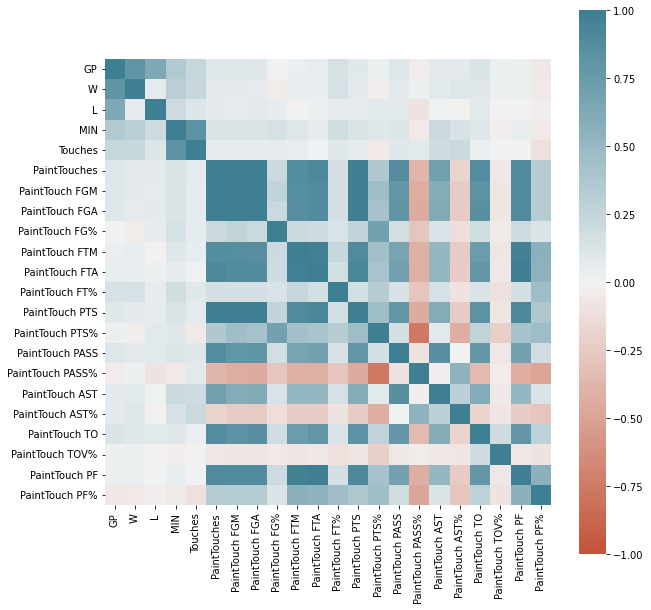

In [497]:
corrHeatMap(paintTouchData)

hi:  3


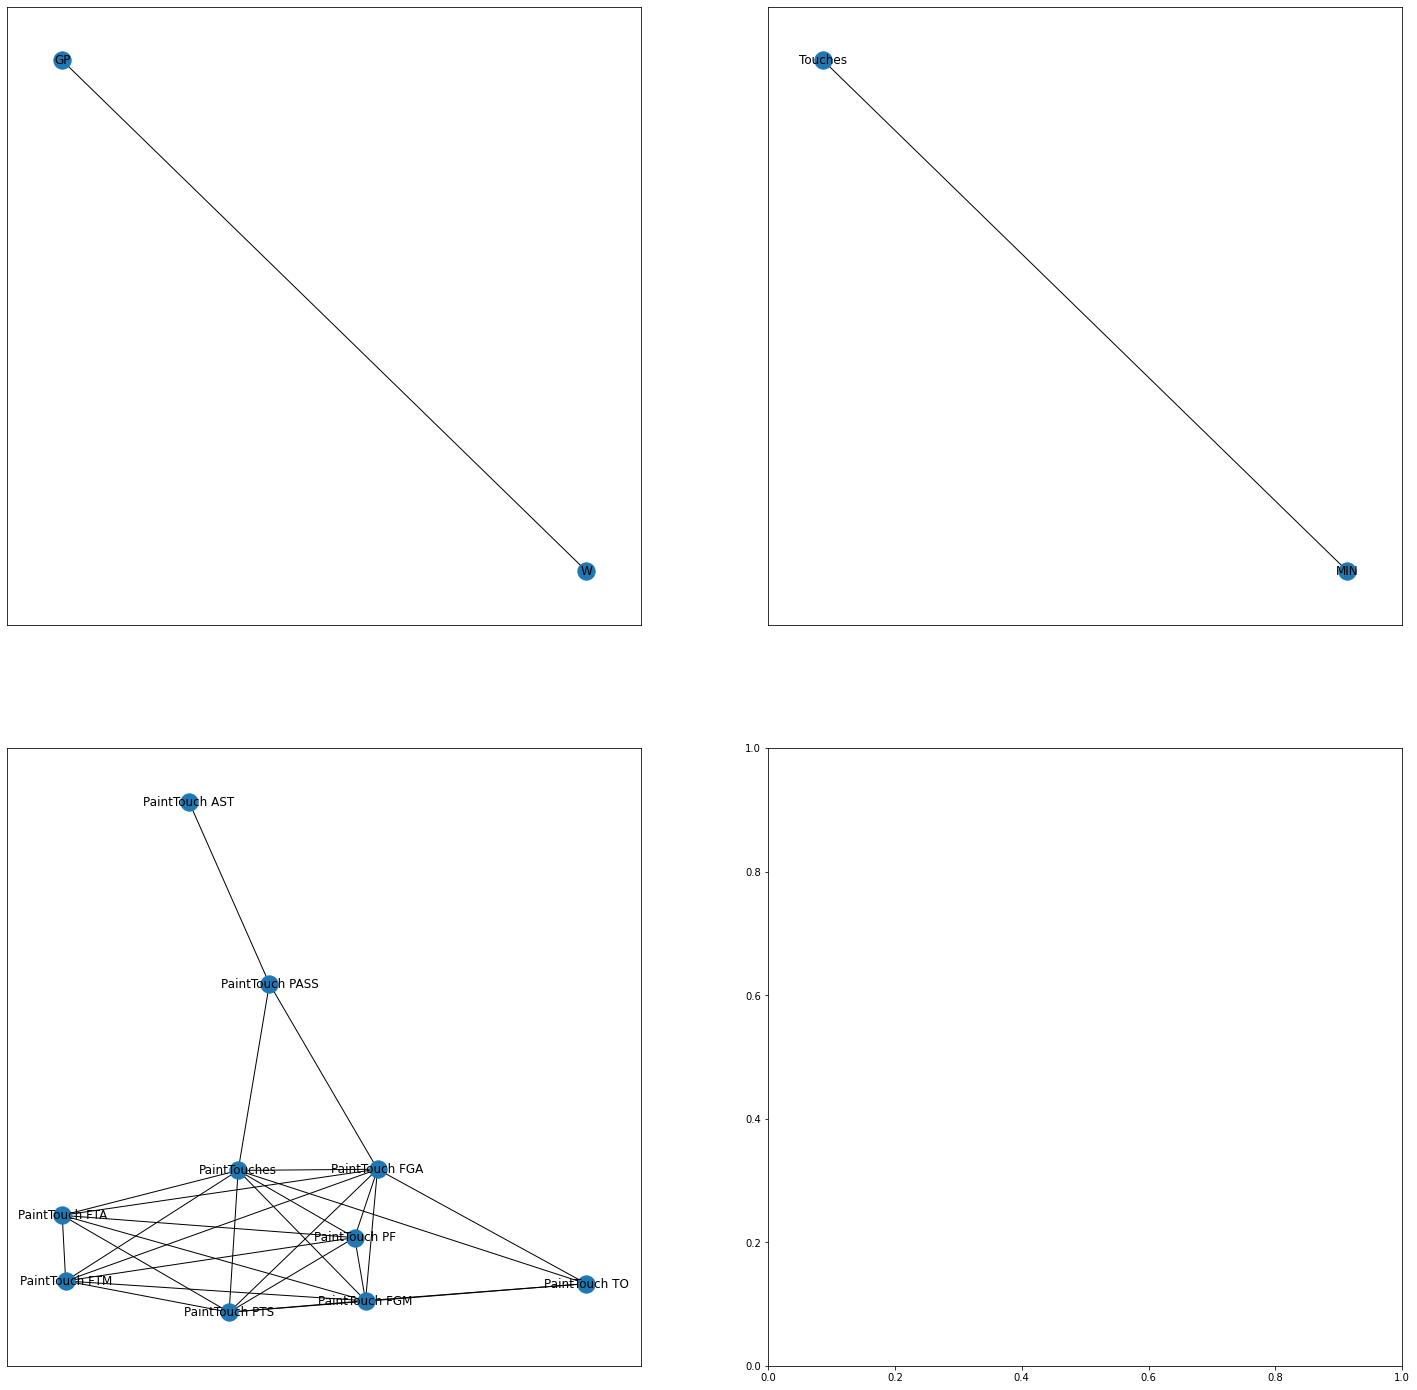

In [498]:
highCorrGraph(paintTouchData)

In [499]:
to_drop.update(['Touches','PaintTouch PASS','PaintTouch FGA','PaintTouch FTA','PaintTouch PF','PaintTouch TO'])

In [500]:
checkData(passingData)

Shape: (540, 16)
Has Null: False


,Unnamed: 0,Player,Team,GP,W,L,MIN,PassesMade,PassesReceived,AST,SecondaryAST,PotentialAST,ASTPTSCreated,ASTAdj,ASTToPass%,ASTToPass%Adj
0,0,Aaron Gordon,DEN,50,29,21,27.7,32.9,34.0,3.2,0.6,5.7,8.1,4.0,9.8,12.3
1,1,Aaron Holiday,IND,66,30,36,17.8,15.5,20.5,1.9,0.3,3.3,5.0,2.4,12.1,15.8
2,2,Aaron Nesmith,BOS,46,22,24,14.5,11.7,9.0,0.5,0.1,1.0,1.2,0.6,4.3,5.2
3,3,Abdel Nader,PHX,24,16,8,14.8,9.4,11.3,0.8,0.0,1.1,2.1,0.9,8.4,9.7
4,4,Adam Mokoka,CHI,14,3,11,4.0,2.4,3.1,0.4,0.1,0.6,0.9,0.4,15.2,18.2


In [501]:
passingData.drop("Unnamed: 0", axis=1, inplace=True)
passingData = dropPlayers(passingData)
checkData(passingData)


Shape: (397, 15)
Has Null: False


,Player,Team,GP,W,L,MIN,PassesMade,PassesReceived,AST,SecondaryAST,PotentialAST,ASTPTSCreated,ASTAdj,ASTToPass%,ASTToPass%Adj
0,Aaron Gordon,DEN,50,29,21,27.7,32.9,34.0,3.2,0.6,5.7,8.1,4.0,9.8,12.3
1,Aaron Holiday,IND,66,30,36,17.8,15.5,20.5,1.9,0.3,3.3,5.0,2.4,12.1,15.8
2,Aaron Nesmith,BOS,46,22,24,14.5,11.7,9.0,0.5,0.1,1.0,1.2,0.6,4.3,5.2
3,Abdel Nader,PHX,24,16,8,14.8,9.4,11.3,0.8,0.0,1.1,2.1,0.9,8.4,9.7
5,Al Horford,BOS,28,11,17,27.9,38.5,39.7,3.4,0.1,5.2,8.6,3.8,8.7,9.7


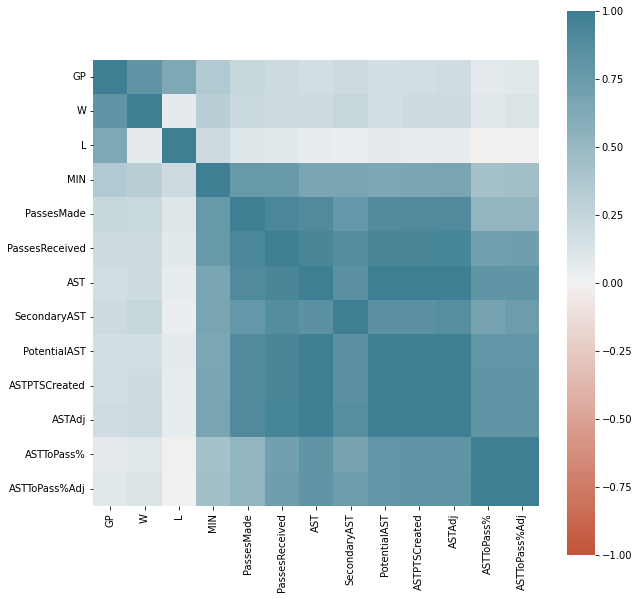

In [502]:
corrHeatMap(passingData)

hi:  2


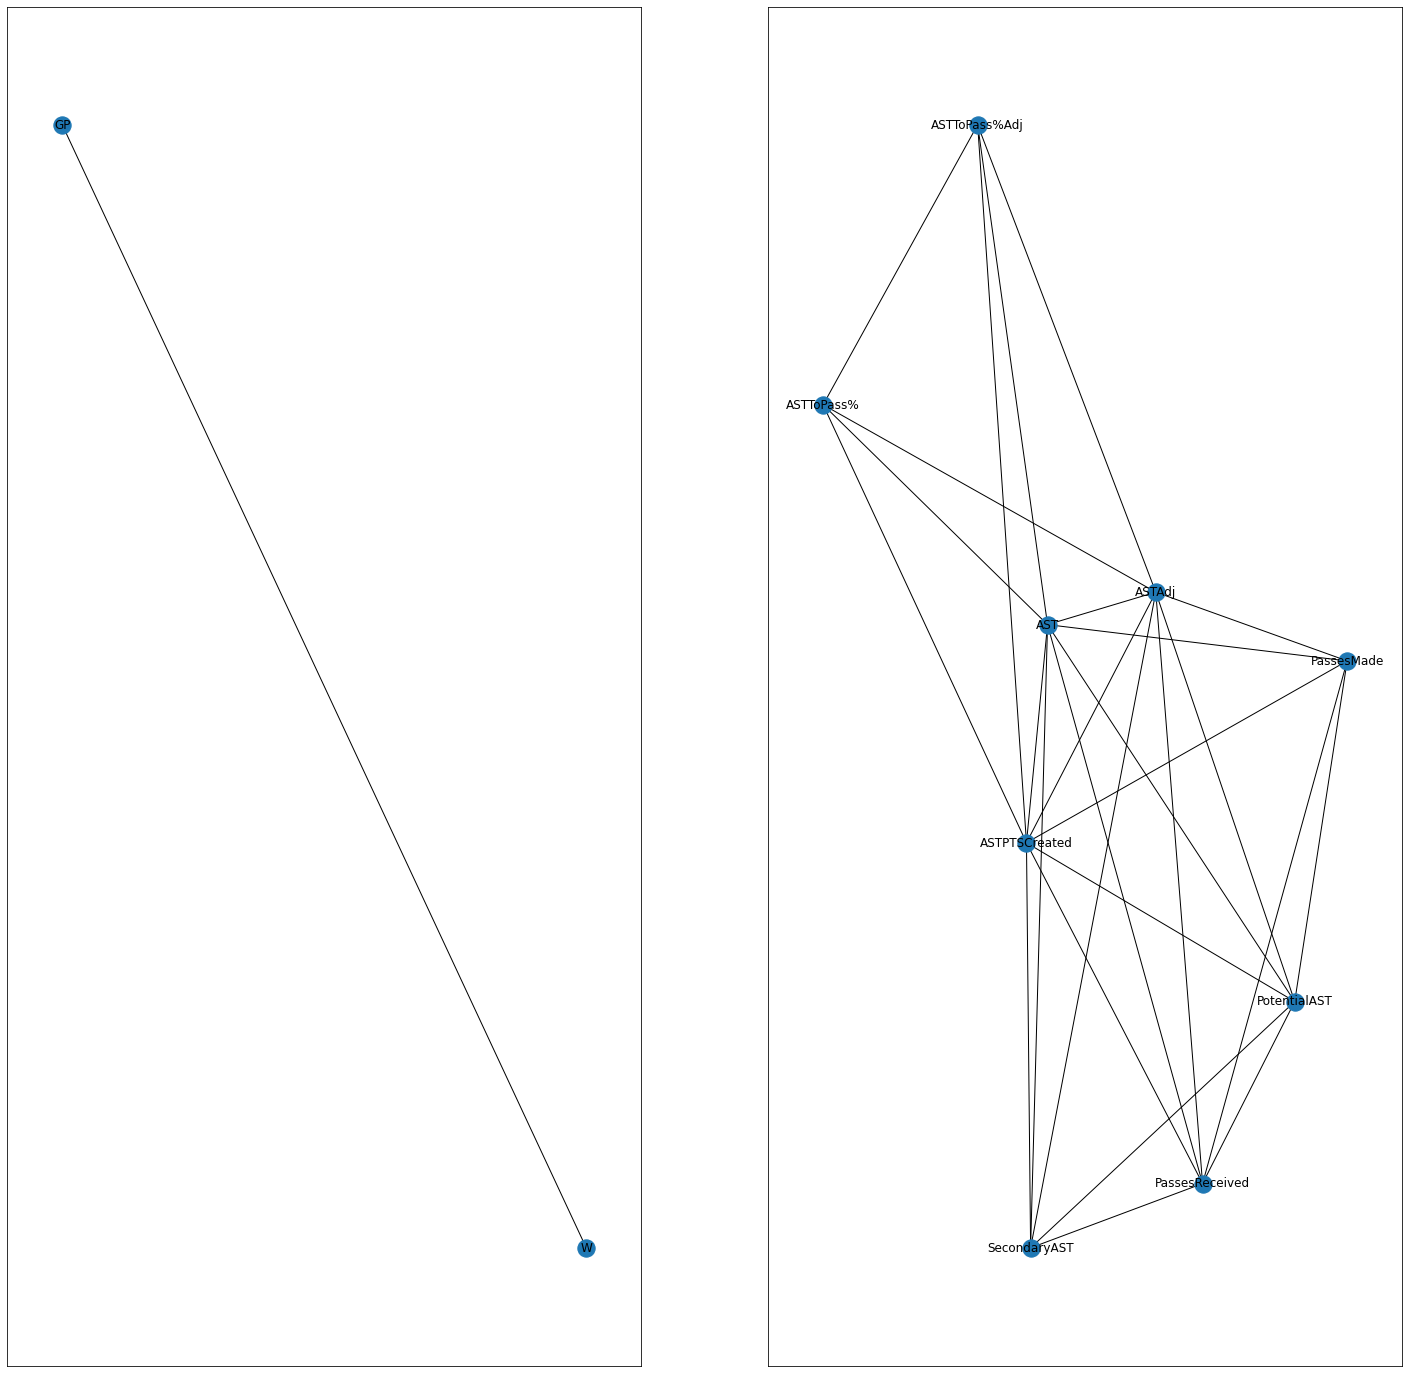

In [503]:
highCorrGraph(passingData)

In [504]:
to_drop.update(['ASTPTSCreated','ASTAdj','ASTToPass%Adj','PotentialAST','PassesReceived'])

In [505]:
checkData(reboundingData)

Shape: (540, 15)
Has Null: False


,Unnamed: 0,Player,Team,GP,W,L,MIN,REB,ContestedREB,ContestedREB%,REBChances,REBChance%,DeferredREBChances,AdjustedREBChance%,AVGREBDistance
0,0,Aaron Gordon,DEN,50,29,21,27.7,5.7,2.1,37.7,8.5,66.5,0.6,71.5,6.5
1,1,Aaron Holiday,IND,66,30,36,17.8,1.3,0.1,10.1,2.6,52.4,0.3,58.2,10.1
2,2,Aaron Nesmith,BOS,46,22,24,14.5,2.8,1.0,36.2,4.7,58.8,0.3,63.2,6.7
3,3,Abdel Nader,PHX,24,16,8,14.8,2.6,0.5,21.0,4.2,62.0,0.4,68.9,6.0
4,4,Adam Mokoka,CHI,14,3,11,4.0,0.4,0.1,40.0,0.6,55.6,0.0,55.6,9.1


In [506]:
reboundingData.drop("Unnamed: 0", axis=1, inplace=True)
reboundingData = dropPlayers(reboundingData)
checkData(reboundingData)

Shape: (397, 14)
Has Null: False


,Player,Team,GP,W,L,MIN,REB,ContestedREB,ContestedREB%,REBChances,REBChance%,DeferredREBChances,AdjustedREBChance%,AVGREBDistance
0,Aaron Gordon,DEN,50,29,21,27.7,5.7,2.1,37.7,8.5,66.5,0.6,71.5,6.5
1,Aaron Holiday,IND,66,30,36,17.8,1.3,0.1,10.1,2.6,52.4,0.3,58.2,10.1
2,Aaron Nesmith,BOS,46,22,24,14.5,2.8,1.0,36.2,4.7,58.8,0.3,63.2,6.7
3,Abdel Nader,PHX,24,16,8,14.8,2.6,0.5,21.0,4.2,62.0,0.4,68.9,6.0
5,Al Horford,BOS,28,11,17,27.9,6.7,2.5,37.2,11.1,60.5,0.6,63.7,6.0


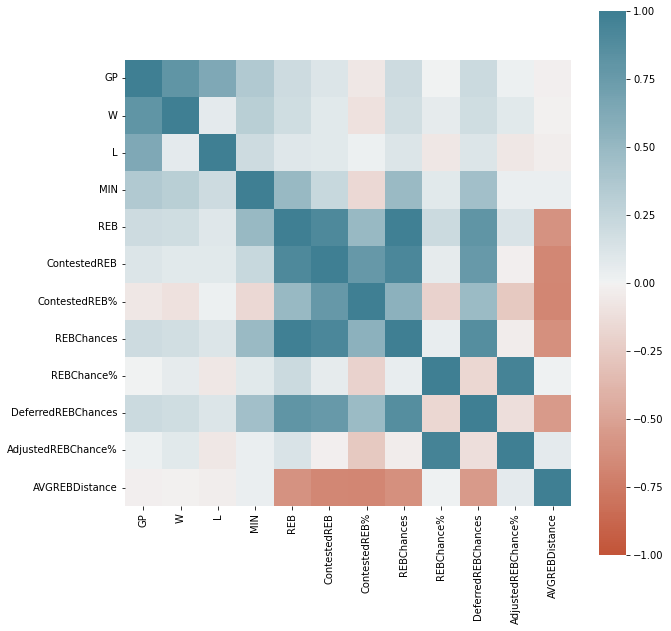

In [507]:
corrHeatMap(reboundingData)

hi:  3


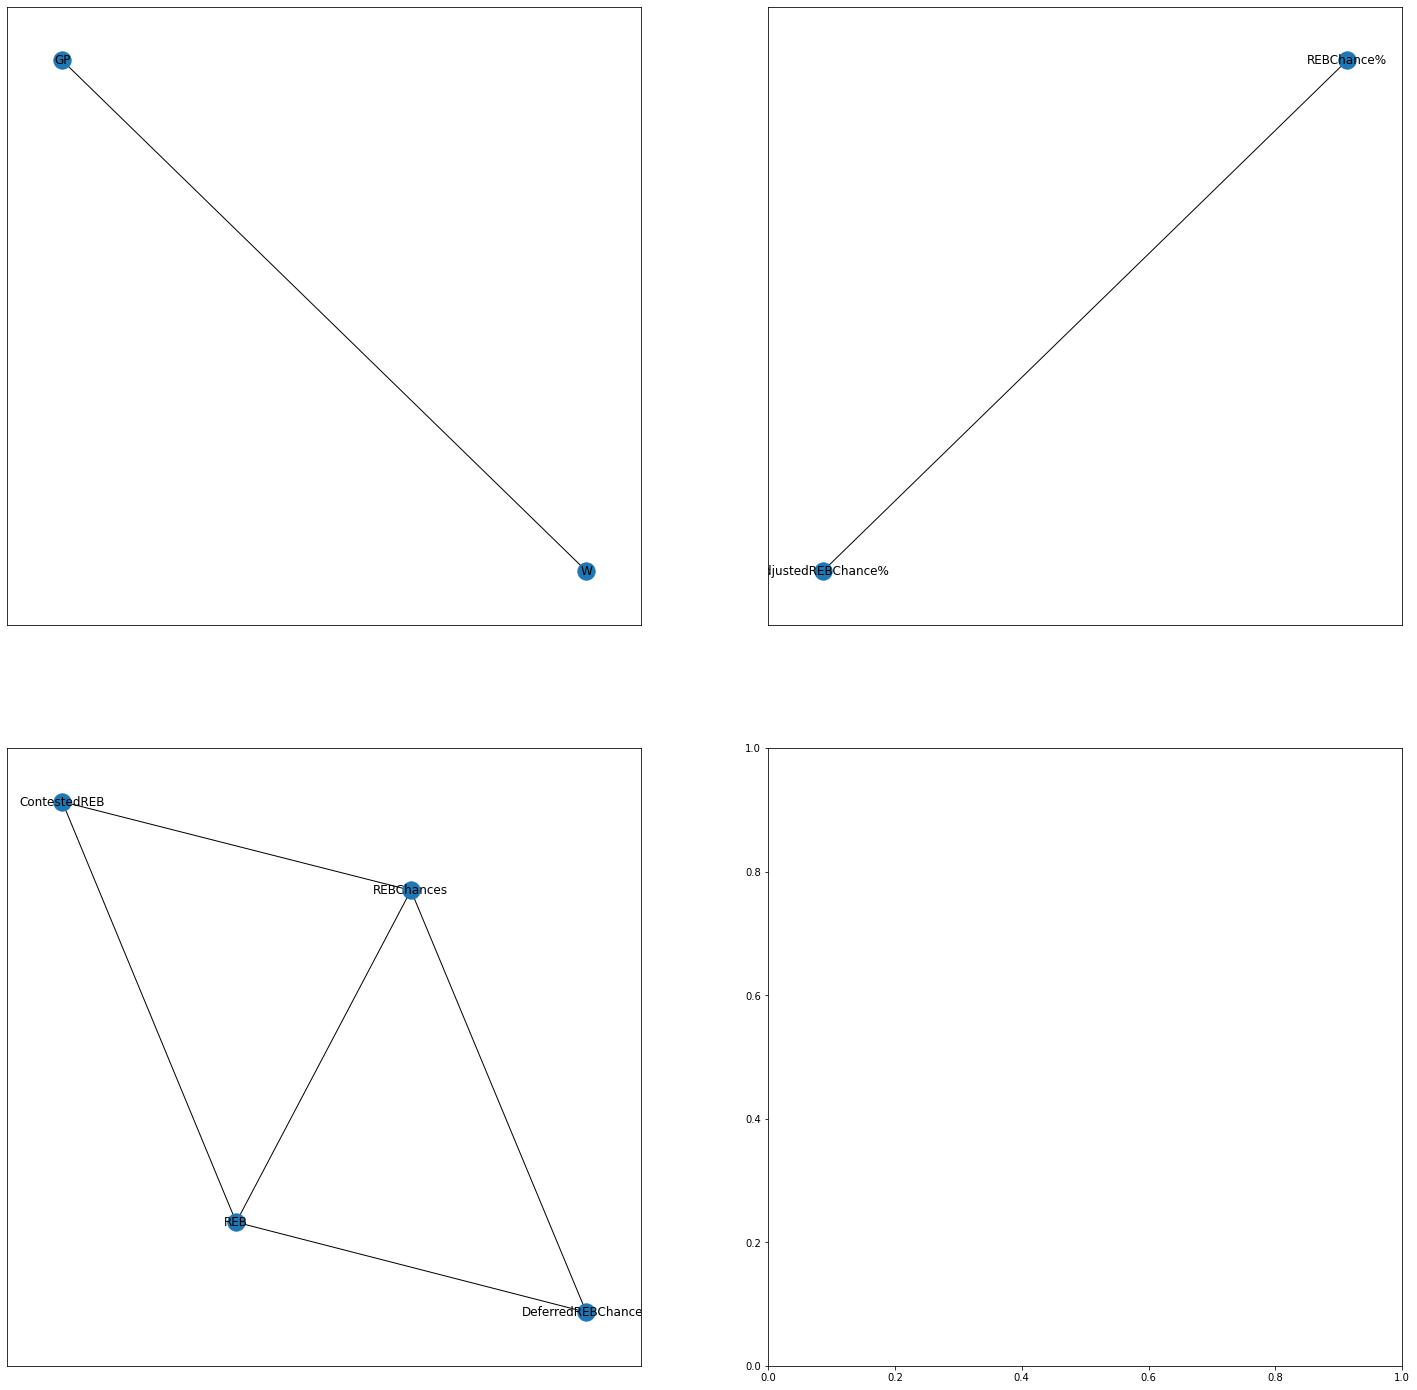

In [508]:
highCorrGraph(reboundingData)

In [509]:
to_drop.update(['REBChances','AdjustedREBChance%','DeferredREBChances'])

In [510]:
checkData(pullUpData)

Shape: (540, 15)
Has Null: False


,Unnamed: 0,Player,Team,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,eFG%
0,0,Aaron Gordon,DEN,50,29,21,27.7,2.4,1.0,3.2,32.3,0.4,1.3,27.3,38.0
1,1,Aaron Holiday,IND,66,30,36,17.8,1.4,0.6,1.6,37.4,0.2,0.7,30.4,43.9
2,2,Aaron Nesmith,BOS,46,22,24,14.5,0.5,0.2,0.7,35.5,0.1,0.3,20.0,40.3
3,3,Abdel Nader,PHX,24,16,8,14.8,0.2,0.1,0.3,33.3,0.0,0.1,0.0,33.3
4,4,Adam Mokoka,CHI,14,3,11,4.0,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.0


In [511]:
pullUpData.drop("Unnamed: 0", axis=1, inplace=True)
pullUpData = dropPlayers(pullUpData)
pullUpData = pullUpData.rename(columns={'PTS':'Pull UpPTS','FGM':'Pull UpFGM','FGA':'Pull UpFGA','FG%':'Pull UpFG%','3PM':'Pull Up3PM','3PA':'Pull Up3PA','3P%':'Pull Up3P%','eFG%':'Pull UpeFG%'})
checkData(pullUpData)

Shape: (397, 14)
Has Null: False


,Player,Team,GP,W,L,MIN,Pull UpPTS,Pull UpFGM,Pull UpFGA,Pull UpFG%,Pull Up3PM,Pull Up3PA,Pull Up3P%,Pull UpeFG%
0,Aaron Gordon,DEN,50,29,21,27.7,2.4,1.0,3.2,32.3,0.4,1.3,27.3,38.0
1,Aaron Holiday,IND,66,30,36,17.8,1.4,0.6,1.6,37.4,0.2,0.7,30.4,43.9
2,Aaron Nesmith,BOS,46,22,24,14.5,0.5,0.2,0.7,35.5,0.1,0.3,20.0,40.3
3,Abdel Nader,PHX,24,16,8,14.8,0.2,0.1,0.3,33.3,0.0,0.1,0.0,33.3
5,Al Horford,BOS,28,11,17,27.9,1.0,0.5,1.2,41.2,0.0,0.2,16.7,42.6


In [512]:
cols = pullUpData.columns.drop(['Player','Team'])
pullUpData[cols] = pullUpData[cols].apply(pd.to_numeric, errors='coerce')

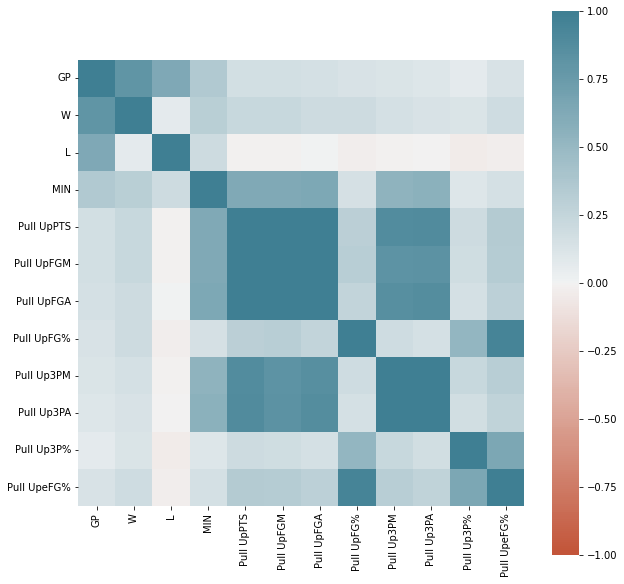

In [513]:
corrHeatMap(pullUpData)

hi:  3


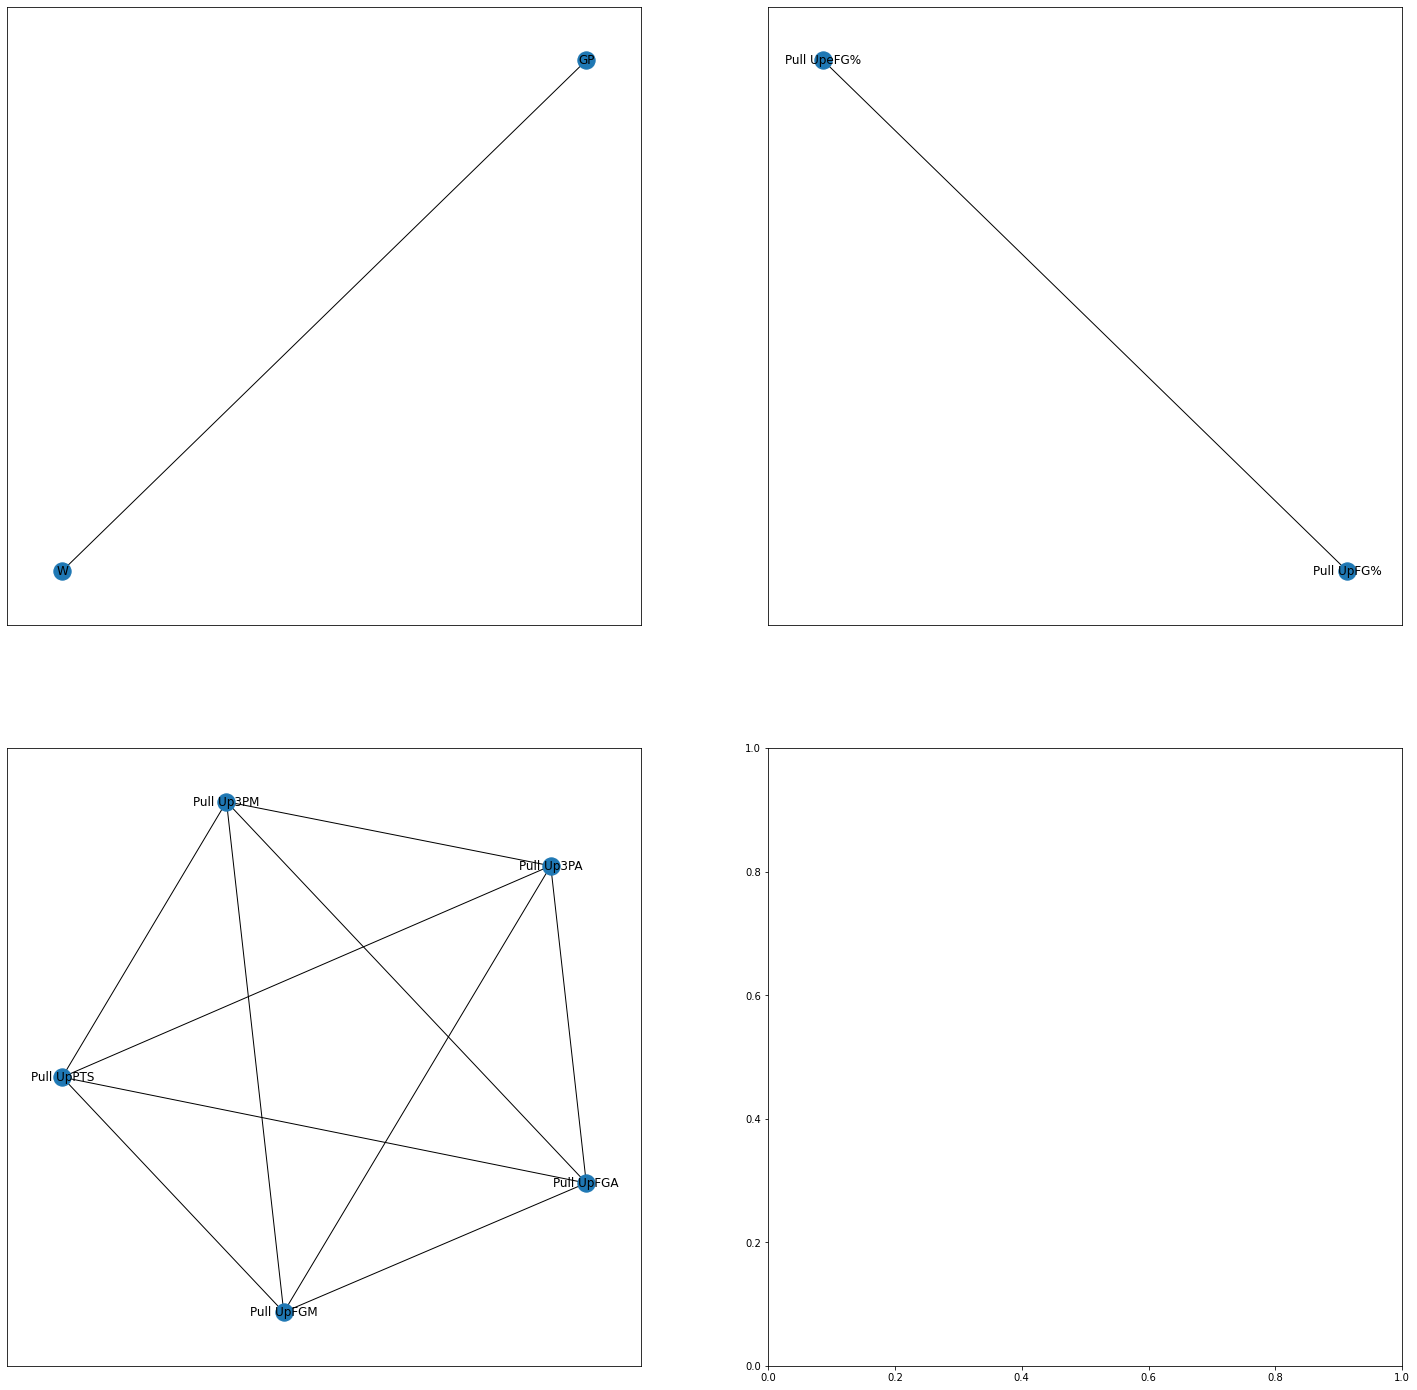

In [514]:
highCorrGraph(pullUpData)

In [515]:
to_drop.update(['Pull UpPTS','Pull UpeFG%','Pull UpFGA','Pull Up3PA'])

In [516]:
checkData(speedDistanceData)

Shape: (540, 14)
Has Null: False


,Unnamed: 0,Player,Team,GP,W,L,MIN,DistFeet,DistMiles,DistMilesOff,DistMilesDef,AvgSpeed,AvgSpeedOff,AvgSpeedDef
0,0,Aaron Gordon,DEN,50,29,21,27.7,10476.6,1.98,1.10,0.89,4.06,4.40,3.71
1,1,Aaron Holiday,IND,66,30,36,17.8,7271.3,1.38,0.71,0.66,4.32,4.70,3.98
2,2,Aaron Nesmith,BOS,46,22,24,14.5,5977.7,1.13,0.59,0.54,4.34,4.53,4.15
3,3,Abdel Nader,PHX,24,16,8,14.8,6038.0,1.14,0.62,0.53,4.41,4.75,4.10
4,4,Adam Mokoka,CHI,14,3,11,4.0,1597.6,0.30,0.15,0.15,4.13,4.48,3.99


In [517]:
speedDistanceData.drop("Unnamed: 0", axis=1, inplace=True)
speedDistanceData = dropPlayers(speedDistanceData)
checkData(speedDistanceData)

Shape: (397, 13)
Has Null: False


,Player,Team,GP,W,L,MIN,DistFeet,DistMiles,DistMilesOff,DistMilesDef,AvgSpeed,AvgSpeedOff,AvgSpeedDef
0,Aaron Gordon,DEN,50,29,21,27.7,10476.6,1.98,1.10,0.89,4.06,4.40,3.71
1,Aaron Holiday,IND,66,30,36,17.8,7271.3,1.38,0.71,0.66,4.32,4.70,3.98
2,Aaron Nesmith,BOS,46,22,24,14.5,5977.7,1.13,0.59,0.54,4.34,4.53,4.15
3,Abdel Nader,PHX,24,16,8,14.8,6038.0,1.14,0.62,0.53,4.41,4.75,4.10
5,Al Horford,BOS,28,11,17,27.9,10105.0,1.91,1.06,0.85,3.89,4.20,3.57


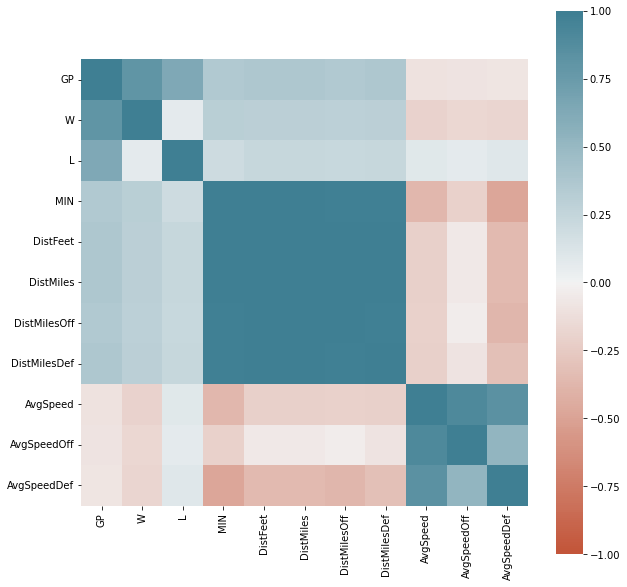

In [518]:
corrHeatMap(speedDistanceData)

hi:  3


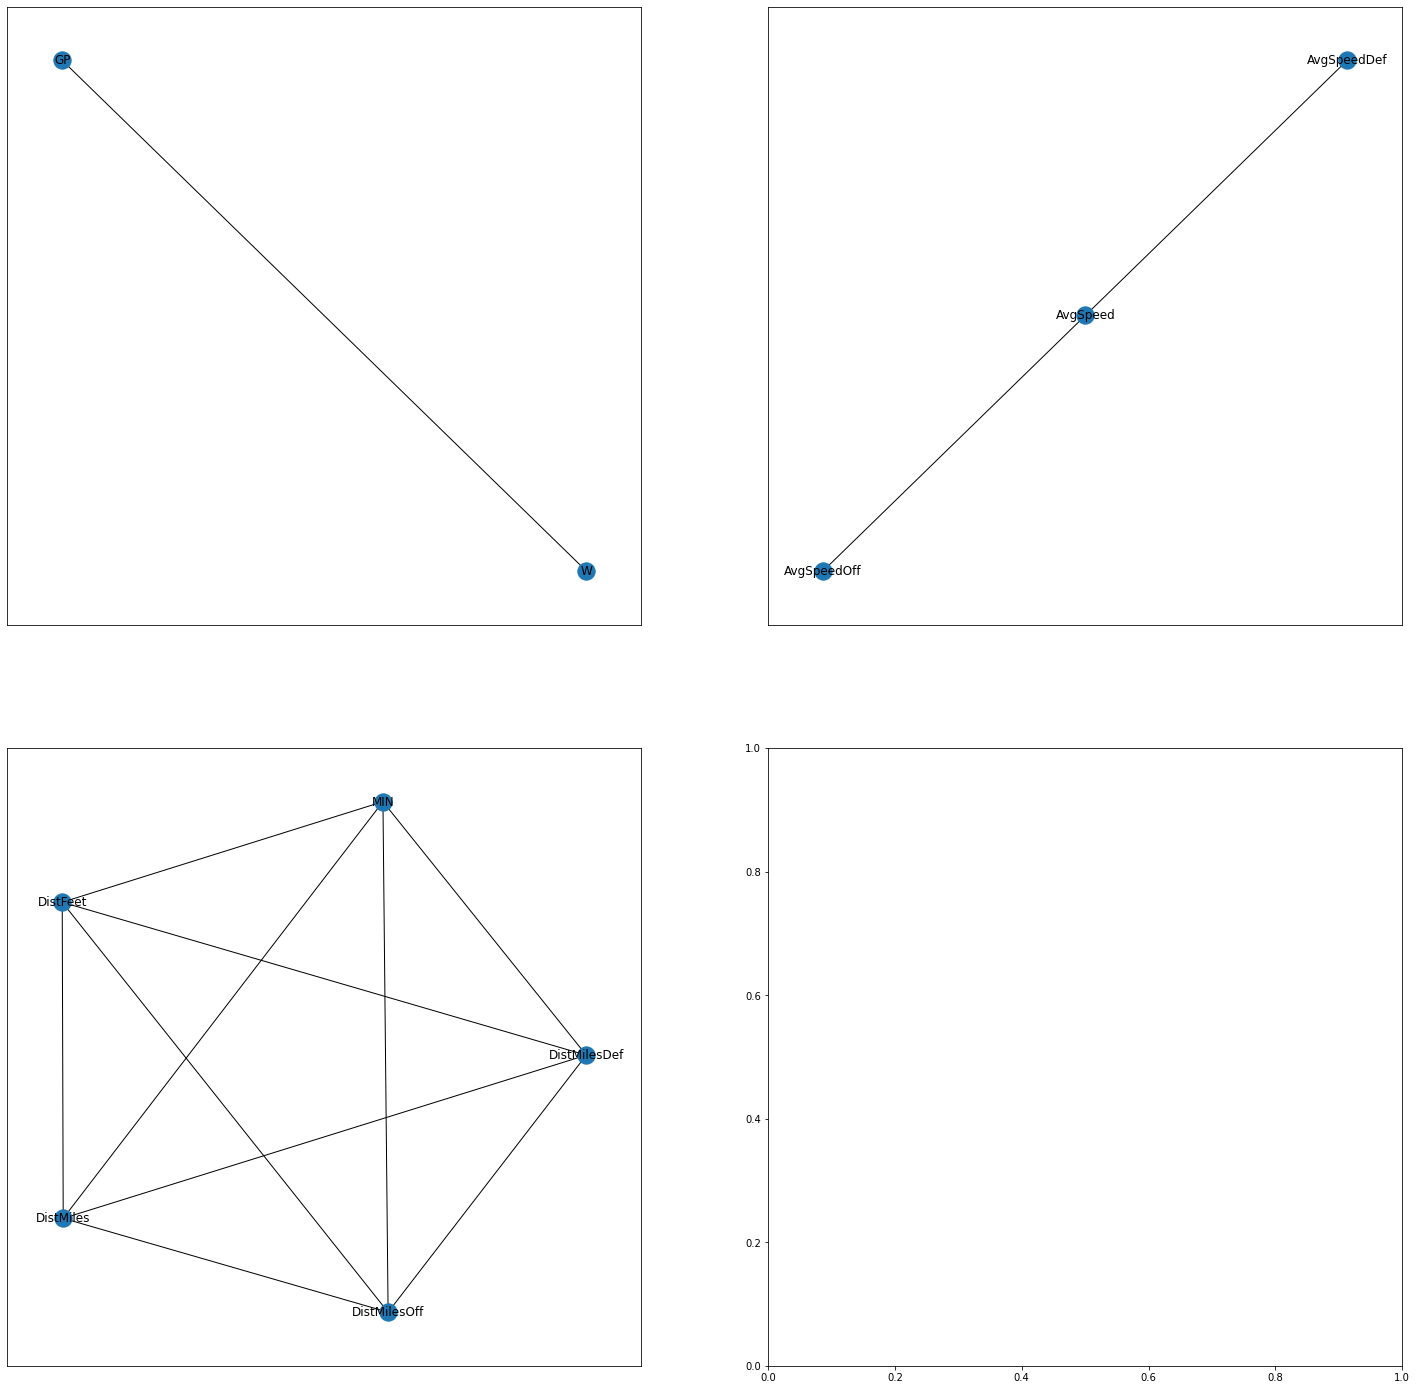

In [519]:
highCorrGraph(speedDistanceData)

In [520]:
to_drop.update(['DistMiles','DistFeet','AvgSpeed'])


In [521]:
checkData(touchesData)

Shape: (540, 20)
Has Null: False


,Unnamed: 0,Player,Team,GP,W,L,MIN,PTS,TOUCHES,Front CTTouches,TimeOfPoss,AvgSecPerTouch,AvgDribPerTouch,PTSPerTouch,ElbowTouches,PostUps,PaintTouches,PTSPerElbow Touch,PTSPerPost Touch,PTSPerPaintTouch
0,0,Aaron Gordon,DEN,50,29,21,27.7,12.4,48.3,25.8,2.9,3.62,2.83,0.256,1.3,2.3,3.8,0.619,0.451,0.938
1,1,Aaron Holiday,IND,66,30,36,17.8,7.2,24.5,15.5,1.2,2.97,2.61,0.293,0.2,0.0,0.3,0.727,0.000,0.591
2,2,Aaron Nesmith,BOS,46,22,24,14.5,4.7,16.7,9.5,0.5,1.67,0.81,0.284,0.2,0.0,0.7,0.500,0.000,0.970
3,3,Abdel Nader,PHX,24,16,8,14.8,6.7,16.2,10.9,0.5,1.91,1.19,0.411,0.0,0.0,0.7,0.000,0.000,1.176
4,4,Adam Mokoka,CHI,14,3,11,4.0,1.1,4.1,3.1,0.1,1.37,0.78,0.259,0.1,0.0,0.1,0.000,0.000,2.000


In [522]:
touchesData.drop("Unnamed: 0", axis=1, inplace=True)
touchesData = dropPlayers(touchesData)
checkData(touchesData)

Shape: (397, 19)
Has Null: False


,Player,Team,GP,W,L,MIN,PTS,TOUCHES,Front CTTouches,TimeOfPoss,AvgSecPerTouch,AvgDribPerTouch,PTSPerTouch,ElbowTouches,PostUps,PaintTouches,PTSPerElbow Touch,PTSPerPost Touch,PTSPerPaintTouch
0,Aaron Gordon,DEN,50,29,21,27.7,12.4,48.3,25.8,2.9,3.62,2.83,0.256,1.3,2.3,3.8,0.619,0.451,0.938
1,Aaron Holiday,IND,66,30,36,17.8,7.2,24.5,15.5,1.2,2.97,2.61,0.293,0.2,0.0,0.3,0.727,0.000,0.591
2,Aaron Nesmith,BOS,46,22,24,14.5,4.7,16.7,9.5,0.5,1.67,0.81,0.284,0.2,0.0,0.7,0.500,0.000,0.970
3,Abdel Nader,PHX,24,16,8,14.8,6.7,16.2,10.9,0.5,1.91,1.19,0.411,0.0,0.0,0.7,0.000,0.000,1.176
5,Al Horford,BOS,28,11,17,27.9,14.2,53.6,38.5,1.9,2.15,0.73,0.265,2.7,3.9,3.5,0.400,0.550,0.753


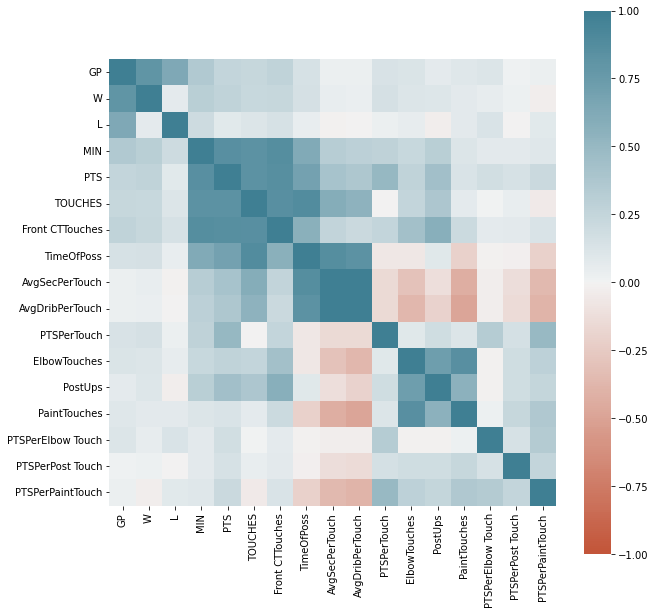

In [523]:
corrHeatMap(touchesData)

hi:  3


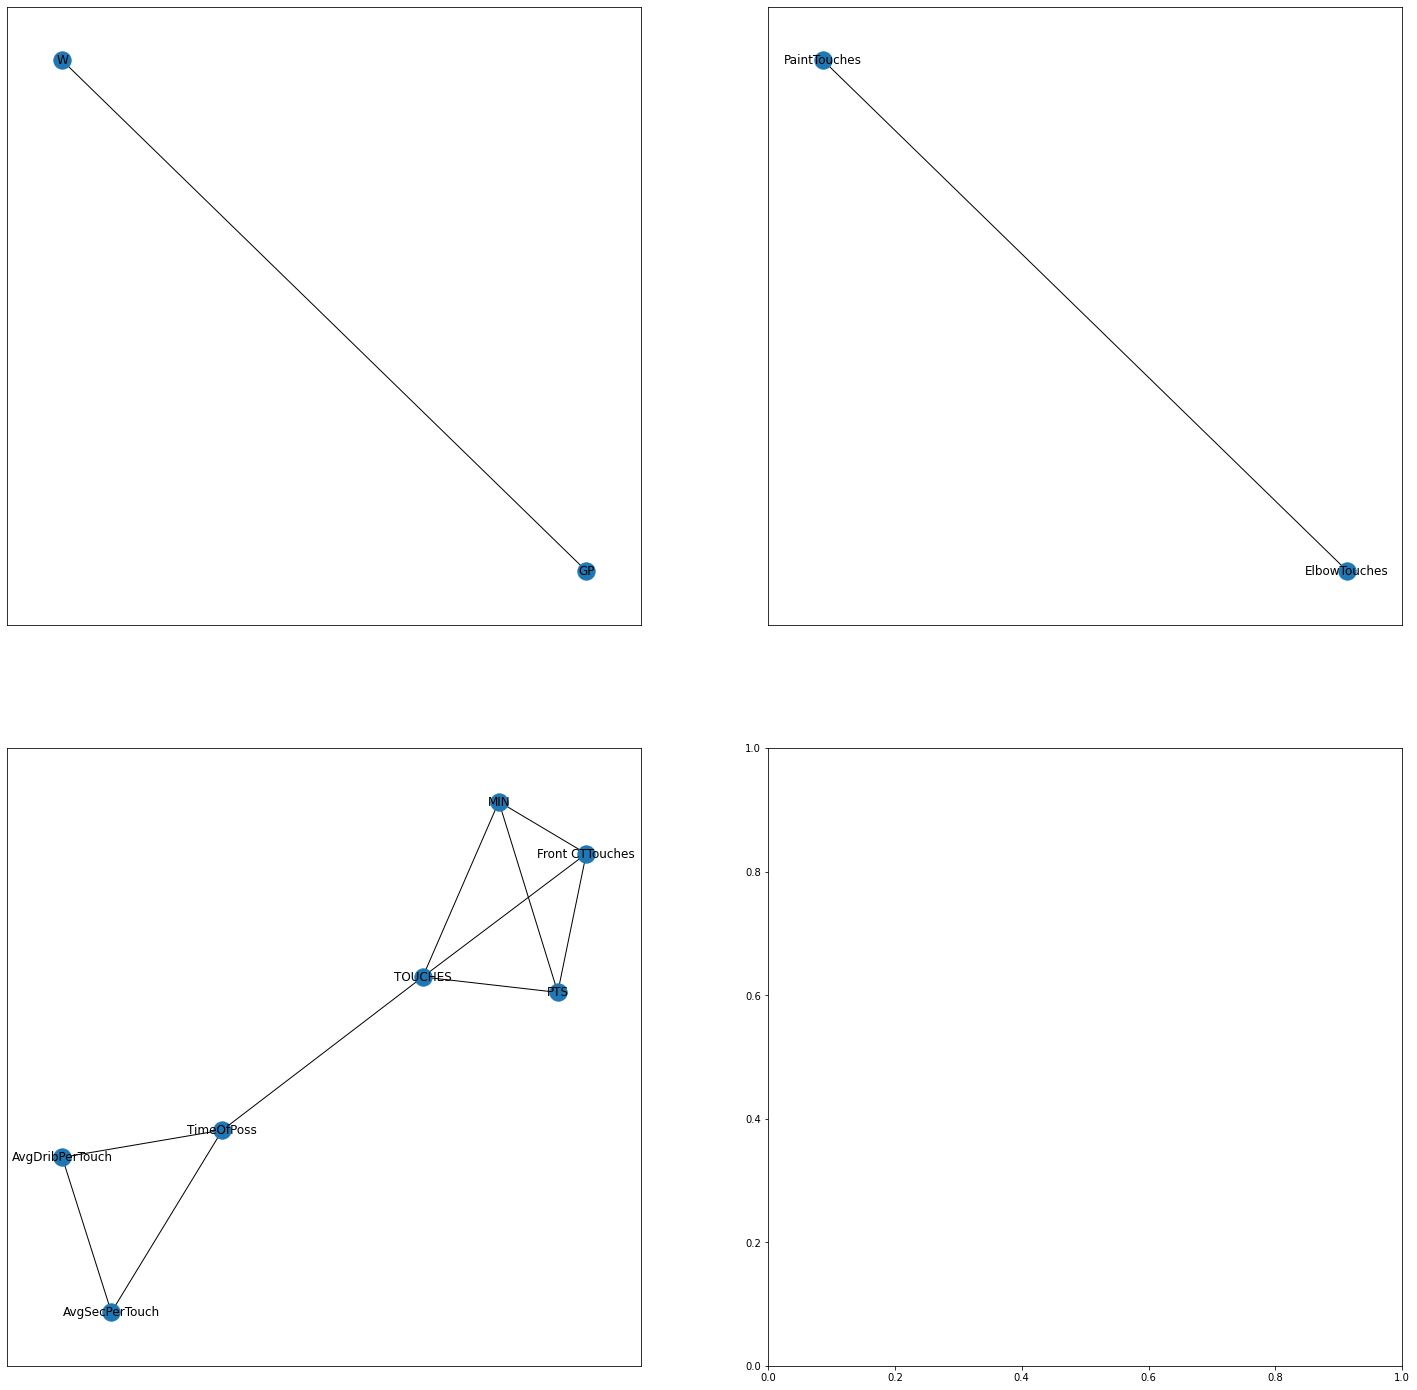

In [524]:
highCorrGraph(touchesData)

In [525]:
to_drop.update(['TOUCHES','PTS','TimeOfPoss'])

In [526]:
checkData(postUpData)

Shape: (540, 25)
Has Null: False


,Unnamed: 0,Player,Team,GP,W,L,MIN,Touches,PostUps,FGM,FGA,FG%,FTM,FTA,FT%,PTS,PTS%,PASS,PASS%,AST,AST%,TO,TOV%,PF,PF%
0,0,Aaron Gordon,DEN,50,29,21,27.7,48.3,2.3,0.3,0.8,38.1,0.4,0.5,75.0,1.0,45.1,0.8,34.5,0.2,8.0,0.2,7.1,0.2,10.6
1,1,Aaron Holiday,IND,66,30,36,17.8,24.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Aaron Nesmith,BOS,46,22,24,14.5,16.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Abdel Nader,PHX,24,16,8,14.8,16.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Adam Mokoka,CHI,14,3,11,4.0,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [527]:
postUpData.drop("Unnamed: 0", axis=1, inplace=True)
postUpData = dropPlayers(postUpData)
postUpData = postUpData.rename(columns={'FGM':'PostTouchFGM','FGA':'PostTouchFGA','FG%':'PostTouchFG%','FTM':'PostTouchFTM','FTA':'PostTouchFTA','FT%':'PostTouchFT%','PTS':'PostTouchPTS','PTS%':'PostTouchPTS%','PASS':'PostTouchPASS','PASS%':'PostTouchPASS%','AST':'PostTouchAST','AST%':'PostTouchAST%','TO':'PostTouchTO','TOV':'PostTouchTOV','TOV%':'PostTouchTOV%','PF':'PostTouchPF','PF%':'PostTouchPF%'})
checkData(postUpData)

Shape: (397, 24)
Has Null: False


,Player,Team,GP,W,L,MIN,Touches,PostUps,PostTouchFGM,PostTouchFGA,PostTouchFG%,PostTouchFTM,PostTouchFTA,PostTouchFT%,PostTouchPTS,PostTouchPTS%,PostTouchPASS,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF,PostTouchPF%
0,Aaron Gordon,DEN,50,29,21,27.7,48.3,2.3,0.3,0.8,38.1,0.4,0.5,75.0,1.0,45.1,0.8,34.5,0.2,8.0,0.2,7.1,0.2,10.6
1,Aaron Holiday,IND,66,30,36,17.8,24.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aaron Nesmith,BOS,46,22,24,14.5,16.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Abdel Nader,PHX,24,16,8,14.8,16.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Al Horford,BOS,28,11,17,27.9,53.6,3.9,1.0,2.3,45.3,0.0,0.0,0.0,2.1,55.0,1.1,29.4,0.3,7.3,0.2,5.5,0.0,0.0


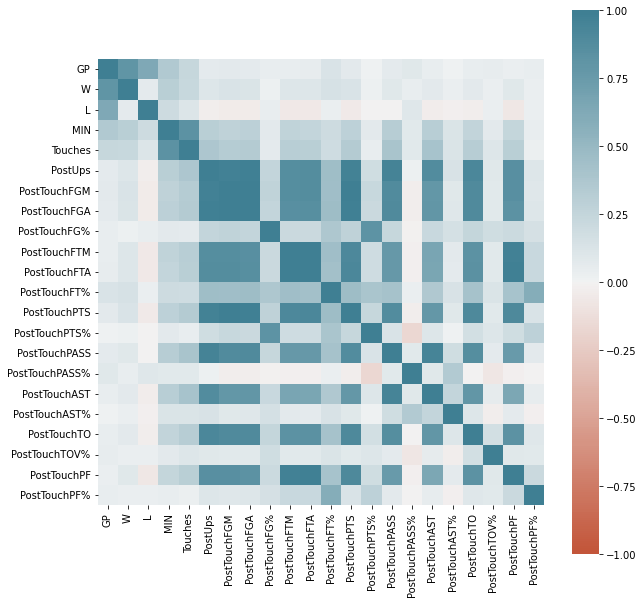

In [528]:
corrHeatMap(postUpData)

hi:  4


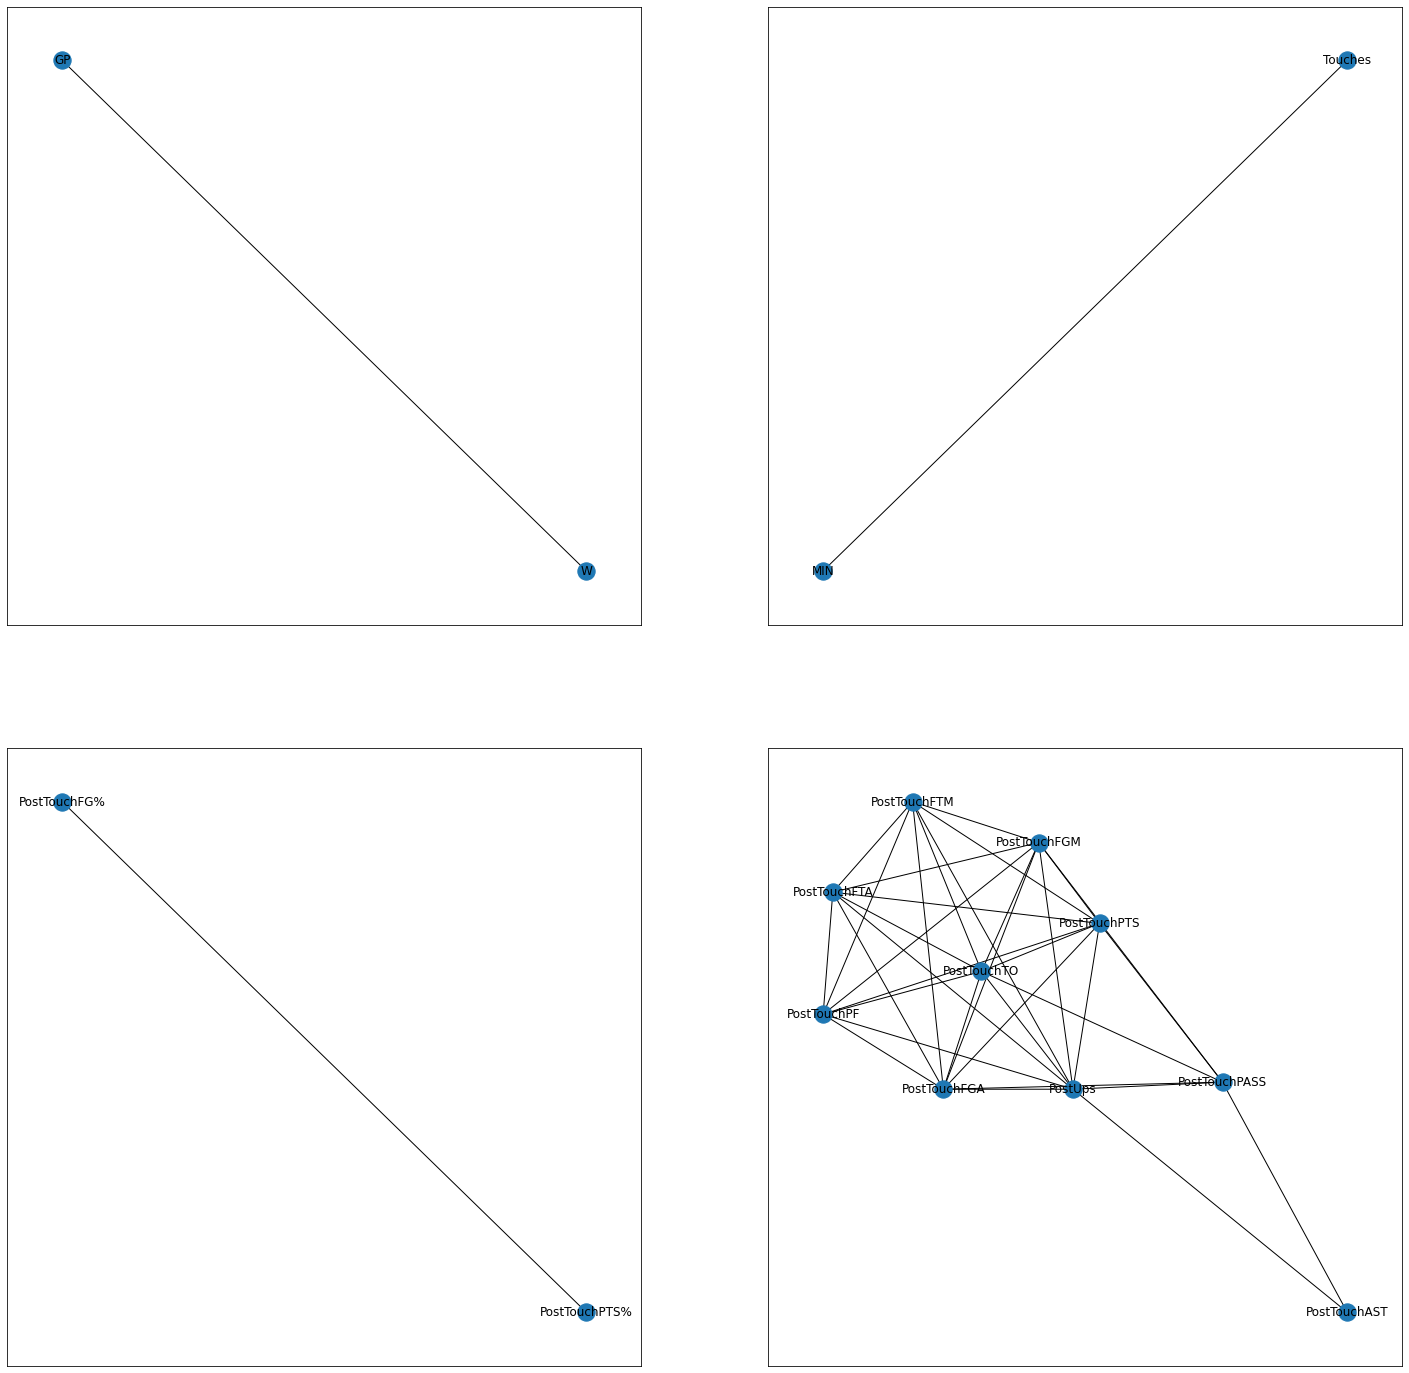

In [529]:
highCorrGraph(postUpData)

In [530]:
to_drop.update(['Touches','PostTouchPASS','PostTouchFGA','PostTouchFTA','PostTouchPF','PostTouchPTS'])

In [531]:
print(to_drop)

{'Touches', 'C&SPTS', 'PostTouchPF', 'DrivePTS', 'DriveFTA', '%PTS2PT', '2FGM%AST', 'PostTouchPTS', 'OPPPTSFB', 'REB', '%PTS3PT', '2FGM%UAST', 'DistMiles', 'PaintTouch TO', 'FGA', 'FP', 'DFGM', 'OFFRTG', 'TS%', 'W', 'PaintTouch PASS', 'PaintTouch FTA', 'PaintTouch PF', 'PassesReceived', 'C&SeFG%', 'Pull UpPTS', 'AvgSpeed', 'DREB', 'AdjustedREBChance%', 'TimeOfPoss', 'FTA', 'OREBChances', 'ContestedOREB', 'PaintTouch FGA', 'OREBChance%', 'ContestedDREB', 'ASTToPass%Adj', 'PostTouchPASS', 'PostTouchFTA', 'Pull Up3PA', 'REBChances', 'Pull UpFGA', 'DistFeet', 'TOV', 'DrivePF', 'DeferredREBChances', 'TOUCHES', 'Pull UpeFG%', 'DREBChance%', 'DD2', '%PTSPITP', 'PTS', '3PA', 'DREBChances', 'MIN', 'REB%', 'ASTPTSCreated', 'BLK', 'C&S3PA', 'OPPPTS2NDCHANCE', 'C&SFGA', 'ASTAdj', 'GP', 'DriveFGA', 'PostTouchFGA', 'L', 'PotentialAST', 'DriveTO'}


In [532]:
general = [basicData, advancedData, defenseData, scoringData, catchShootData, defensiveImpactData, defensiveReboundingData, driveData, \
            offensiveReboundingData, paintTouchData, passingData, reboundingData, pullUpData, speedDistanceData, \
           touchesData, postUpData] 

generalData = pd.DataFrame()
generalData['Player'] = basicData['Player']
for x in general:
    generalData = generalData.merge(x,on="Player",how="outer",suffixes=("","_delme"))

generalData = generalData[[c for c in generalData.columns if not c.endswith('_delme')]]

# print rows with missing values
generalData[generalData.isna().any(axis=1)].head()


,Player,Team,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TO Ratio,eFG%,TS%,USG%,PACE,PIE,POSS,DEF RTG,%DREB,STL%,%BLK,OPPPTSOFFTOV,OPPPTS2NDCHANCE,OPPPTSFB,OPPPTSPAINT,DEFWS,%FGA2PT,%FGA3PT,%PTS2PT,%PTS2PT MR,%PTS3PT,%PTSFBPs,%PTSFT,%PTSOffTO,%PTSPITP,2FGM%AST,2FGM%UAST,3FGM%AST,3FGM%UAST,FGM%AST,FGM%UAST,C&SPTS,C&SFGM,C&SFGA,C&SFG%,C&S3PM,C&S3PA,C&S3P%,C&SeFG%,DFGM,DFGA,DFG%,ContestedDREB,ContestedDREB%,DREBChances,DREBChance%,DeferredDREB Chances,AdjustedDREB Chance%,AVG DREBDistance,Drives,DriveFGM,DriveFGA,DriveFG%,DriveFTM,DriveFTA,DriveFT%,DrivePTS,DrivePTS%,DrivePASS,DrivePASS%,DriveAST,DriveAST%,DriveTO,DriveTOV%,DrivePF,DrivePF%,ContestedOREB,ContestedOREB%,OREBChances,OREBChance%,DeferredOREB Chances,AdjustedOREB Chance%,AVG OREBDistance,Touches,PaintTouches,PaintTouch FGM,PaintTouch FGA,PaintTouch FG%,PaintTouch FTM,PaintTouch FTA,PaintTouch FT%,PaintTouch PTS,PaintTouch PTS%,PaintTouch PASS,PaintTouch PASS%,PaintTouch AST,PaintTouch AST%,PaintTouch TO,PaintTouch TOV%,PaintTouch PF,PaintTouch PF%,PassesMade,PassesReceived,SecondaryAST,PotentialAST,ASTPTSCreated,ASTAdj,ASTToPass%,ASTToPass%Adj,ContestedREB,ContestedREB%,REBChances,REBChance%,DeferredREBChances,AdjustedREBChance%,AVGREBDistance,Pull UpPTS,Pull UpFGM,Pull UpFGA,Pull UpFG%,Pull Up3PM,Pull Up3PA,Pull Up3P%,Pull UpeFG%,DistFeet,DistMiles,DistMilesOff,DistMilesDef,AvgSpeed,AvgSpeedOff,AvgSpeedDef,TOUCHES,Front CTTouches,TimeOfPoss,AvgSecPerTouch,AvgDribPerTouch,PTSPerTouch,ElbowTouches,PostUps,PTSPerElbow Touch,PTSPerPost Touch,PTSPerPaintTouch,PostTouchFGM,PostTouchFGA,PostTouchFG%,PostTouchFTM,PostTouchFTA,PostTouchFT%,PostTouchPTS,PostTouchPTS%,PostTouchPASS,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF,PostTouchPF%
82,Clint Capela,ATL,27,63,34,29,30.1,15.2,6.6,11.0,59.4,0.0,0.0,0.0,2.1,3.6,57.3,4.7,9.6,14.3,0.8,1.2,0.7,2.0,2.3,40.6,48,1,4.0,114.8,108.2,6.6,3.9,0.67,5.3,15.5,30.1,23.0,8.0,59.4,60.1,19.3,99.41,15.8,"3,927",108.2,41.9,16.7,58.1,9.4,8.0,7.4,30.2,0.110,100.0,0.0,86.4,0.2,0.0,8.7,13.6,12.1,86.2,66.8,33.2,0.0,0.0,66.8,33.2,0.0,0.0,0.1,0.0,NaN,NaN,NaN,0.0,4.1,7.7,52.8,3.3,34.7,14.9,64.5,1.4,71.3,4.7,0.5,0.1,0.3,36.8,0.0,0.1,33.3,0.3,51.6,0.1,12.9,0.0,3.2,0.0,0.0,0.0,9.7,3.6,76.1,8.7,54.1,0.1,55.0,5.1,47.1,12.3,5.4,8.7,62.0,1.1,1.9,57.4,12.0,97.7,1.7,13.6,0.3,2.1,0.5,4.1,0.9,7.6,32.7,20.2,0.3,1.7,2.3,1.3,2.4,3.9,6.9,48.3,23.2,61.9,1.6,66.4,4.8,0.1,0.0,0.1,33.3,NaN,NaN,NaN,33.3,11490.6,2.18,1.16,1.02,4.09,4.33,3.85,47.1,24.0,1.1,1.42,0.33,0.322,3.4,1.6,0.519,0.564,0.977,0.4,1.0,41.0,0.1,0.2,58.3,0.9,56.4,0.3,20.8,0.1,5.0,0.1,8.9,0.1,5.9
86,Andre Drummond,LAL,27,46,19,27,27.0,14.9,6.1,12.4,49.3,0.0,0.2,0.0,2.7,4.5,60.0,3.6,8.4,12.0,2.0,2.7,1.4,1.1,3.2,37.0,28,0,-2.3,107.5,111.4,-3.9,12.4,0.76,10.7,13.2,33.6,22.9,14.1,49.3,51.9,26.9,98.31,13.9,"2,540",111.4,47.2,28.8,45.4,10.0,5.5,7.3,27.1,0.072,98.6,1.4,82.1,0.0,0.0,7.4,17.9,16.7,82.1,57.1,42.9,0.0,0.0,57.1,42.9,0.0,0.0,0.5,4.5,0.0,0.2,0.0,4.5,3.4,5.5,61.8,3.0,35.8,11.5,72.8,0.7,77.2,4.1,2.8,0.8,1.9,39.8,0.3,0.5,58.3,1.8,64.9,0.3,12.2,0.1,3.1,0.3,9.2,0.3,9.2,2.6,72.9,6.9,52.0,0.1,52.7,4.3,53.0,10.0,3.7,6.5,56.6,0.9,1.6,58.3,8.4,83.7,1.7,16.5,0.3,3.0,0.6,5.9,0.8,7.6,34.8,28.1,0.3,3.4,4.9,2.5,5.9,7.1,5.6,47.0,17.7,67.9,0.7,70.8,4.2,0.3,0.2,0.2,63.6,0.0,0.0,NaN,63.6,9821.8,1.86,0.96,0.90,3.89,3.98,3.79,53.0,30.0,1.9,2.15,0.89,0.282,4.1,6.4,0.466,0.490,0.837,1.2,3.0,40.6,0.6,1.0,56.5,3.1,49.0,1.9,30.3,0.4,5.8,0.6,9.9,0.5,7.8
91,Deandre Ayton,PHX,22,69,48,21,30.6,14.4,6.2,10.0,62.6,0.1,0.3,20.0,1.9,2.5,76.9,3.3,7.2,10.5,1.4,1.5,0.6,1.2,2.8,33.1,33,0,4.0,117.1,110.8,6.3,6.6,0.96,10.3,11.7,23.6,17.9,10.7,62.9,65.3,17.9,98.05,13.0,"4,320",110.8,34.0,13.1,39.1,10.0,8.3,8.0,30.0,0.088,97.1,2.9,85.5,8.0,1.2,5.4,13.3,13.2,77.4,71.4,28.6,100.0,0.0,71.6,28.4,1.3,0.6,1.6,39.8,0.1,0.3,22.2,41.7,2.9,5.0,58.0,2.5,35.1,10.8,67.2,1.0,73.9,4.3,0.2,0.1,0.1,66.7,0.1,0.

In [533]:
# find all coloumns with missing values
print(generalData.columns[generalData.isna().any()].tolist())

['C&SFG%', 'C&S3PM', 'C&S3PA', 'C&S3P%', 'C&SeFG%', 'Pull UpFG%', 'Pull Up3PM', 'Pull Up3PA', 'Pull Up3P%', 'Pull UpeFG%']


In [534]:
# we fill all missing values with 0 as these players do not catch and shoot or pull up
generalData = generalData.fillna(0.0)


checkData(generalData)

Shape: (397, 186)
Has Null: False


,Player,Team,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TO Ratio,eFG%,TS%,USG%,PACE,PIE,POSS,DEF RTG,%DREB,STL%,%BLK,OPPPTSOFFTOV,OPPPTS2NDCHANCE,OPPPTSFB,OPPPTSPAINT,DEFWS,%FGA2PT,%FGA3PT,%PTS2PT,%PTS2PT MR,%PTS3PT,%PTSFBPs,%PTSFT,%PTSOffTO,%PTSPITP,2FGM%AST,2FGM%UAST,3FGM%AST,3FGM%UAST,FGM%AST,FGM%UAST,C&SPTS,C&SFGM,C&SFGA,C&SFG%,C&S3PM,C&S3PA,C&S3P%,C&SeFG%,DFGM,DFGA,DFG%,ContestedDREB,ContestedDREB%,DREBChances,DREBChance%,DeferredDREB Chances,AdjustedDREB Chance%,AVG DREBDistance,Drives,DriveFGM,DriveFGA,DriveFG%,DriveFTM,DriveFTA,DriveFT%,DrivePTS,DrivePTS%,DrivePASS,DrivePASS%,DriveAST,DriveAST%,DriveTO,DriveTOV%,DrivePF,DrivePF%,ContestedOREB,ContestedOREB%,OREBChances,OREBChance%,DeferredOREB Chances,AdjustedOREB Chance%,AVG OREBDistance,Touches,PaintTouches,PaintTouch FGM,PaintTouch FGA,PaintTouch FG%,PaintTouch FTM,PaintTouch FTA,PaintTouch FT%,PaintTouch PTS,PaintTouch PTS%,PaintTouch PASS,PaintTouch PASS%,PaintTouch AST,PaintTouch AST%,PaintTouch TO,PaintTouch TOV%,PaintTouch PF,PaintTouch PF%,PassesMade,PassesReceived,SecondaryAST,PotentialAST,ASTPTSCreated,ASTAdj,ASTToPass%,ASTToPass%Adj,ContestedREB,ContestedREB%,REBChances,REBChance%,DeferredREBChances,AdjustedREBChance%,AVGREBDistance,Pull UpPTS,Pull UpFGM,Pull UpFGA,Pull UpFG%,Pull Up3PM,Pull Up3PA,Pull Up3P%,Pull UpeFG%,DistFeet,DistMiles,DistMilesOff,DistMilesDef,AvgSpeed,AvgSpeedOff,AvgSpeedDef,TOUCHES,Front CTTouches,TimeOfPoss,AvgSecPerTouch,AvgDribPerTouch,PTSPerTouch,ElbowTouches,PostUps,PTSPerElbow Touch,PTSPerPost Touch,PTSPerPaintTouch,PostTouchFGM,PostTouchFGA,PostTouchFG%,PostTouchFTM,PostTouchFTA,PostTouchFT%,PostTouchPTS,PostTouchPTS%,PostTouchPASS,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF,PostTouchPF%
0,Stephen Curry,GSW,33,63,37,26,34.2,32.0,10.4,21.7,48.2,5.3,12.7,42.1,5.7,6.3,91.6,0.5,5.0,5.5,5.8,3.4,1.2,0.1,1.9,47.9,8,0,3.9,114.2,109.6,4.6,28.3,1.70,17.4,1.3,13.5,7.7,10.2,60.5,65.5,33.1,105.16,18.1,"4,725",109.6,19.9,20.9,3.8,13.0,10.2,10.1,32.5,0.112,41.3,58.7,31.9,6.6,50.2,11.4,17.9,14.5,25.3,41.1,58.9,58.8,41.2,50.2,49.8,7.3,2.5,5.6,44.6,2.3,5.4,43.7,65.6,1.1,1.4,80.0,0.8,16.5,8.0,62.9,0.7,69.1,8.1,10.9,2.7,4.9,55.5,1.6,1.7,91.6,7.3,67.7,4.2,38.5,0.9,8.5,0.7,6.0,0.8,7.7,0.3,55.2,1.5,31.2,0.0,31.9,11.2,81.3,1.0,0.5,0.8,64.7,0.0,0.0,0.0,1.1,110.8,0.2,15.4,0.0,3.1,0.0,3.1,0.0,0.0,51.6,67.9,1.3,10.0,14.7,7.8,11.2,15.1,1.1,19.7,9.4,58.5,0.7,63.5,8.4,11.2,4.1,9.8,42.3,2.9,7.2,40.9,57.3,13686.9,2.59,1.44,1.16,4.30,5.03,3.65,81.3,32.6,5.8,4.26,4.08,0.393,0.8,0.1,0.922,1.111,1.108,0.1,0.1,50.0,0.0,0.0,0.0,0.2,111.1,0.0,0.0,0.0,0.0,0.0,11.1,0.0,0.0
1,Bradley Beal,WAS,28,60,32,28,35.8,31.3,11.2,23.0,48.5,2.2,6.2,34.9,6.8,7.7,88.9,1.2,3.5,4.7,4.4,3.1,1.2,0.4,2.3,45.0,4,0,-0.1,114.4,114.8,-0.4,20.2,1.42,13.2,3.3,9.4,6.4,9.3,53.2,59.3,33.1,105.21,14.5,"4,713",114.8,13.6,19.9,11.9,13.1,10.2,8.3,35.6,0.061,73.0,27.0,57.5,16.8,20.8,7.1,21.7,13.5,40.7,43.0,57.0,72.3,27.7,48.7,51.3,4.5,1.6,4.1,39.5,1.3,3.3,38.7,55.3,1.4,2.0,72.0,0.7,19.0,5.8,60.3,0.6,66.8,7.5,15.7,4.5,8.5,53.5,2.5,2.9,86.2,12.2,77.3,4.6,28.9,1.0,6.1,0.9,5.9,1.4,9.1,0.5,40.3,2.8,42.9,0.2,45.6,9.0,69.0,2.3,0.9,1.5,62.9,0.4,0.4,91.7,2.3,99.3,0.4,18.0,0.1,2.2,0.1,5.8,0.2,7.9,37.8,53.5,0.6,8.5,11.4,5.5,11.7,14.6,1.2,24.4,8.5,55.5,0.7,60.7,7.9,8.4,3.8,9.0,41.8,0.9,2.9,30.8,46.7,13816.7,2.62,1.39,1.23,4.18,4.59,3.80,69.0,47.5,3.8,3.33,2.77,0.454,1.3,0.5,0.667,0.407,0.993,0.1,0.3,25.0,0.0,0.0,100.0,0.2,40.7,0.1,29.6,0.0,7.4,0.0,3.7,0.0,3.7
2,Damian Lillard,POR,30,67,39,28,35.8,28.8,9.0,19.9,45.1,4.1,10.5,39.1,6.7,7.2,92.8,0.5,3.7,4.2,7.5,3.0,0.9,0.3,1.5,45.7,16,0,3.0,119.6,115.6,4.0,33.4,2.49,22.5,1.2,10.4,5.7,9.0,55.4,62.3,30.6,100.40,15.8,"5,014",115.6,14.9,17.4,7.0,11.2,9.6,10.3,35.5,0.054,47.2,52.8,33.9,7.5,42.8,8.4,23.3,12.0,26.5,17.7,82.3,39.3,60.7,27.6,72.4,3.2,1.1,2.4,46.0,1.0,2.3,45.4,67.4,1.3,1.6,78.0,0.4,11.2,5.7,65.5,0.4,70.5,9.1

In [535]:
generalData.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 396
Data columns (total 186 columns):
 #    Column                Dtype  
---   ------                -----  
 0    Player                object 
 1    Team                  object 
 2    AGE                   int64  
 3    GP                    int64  
 4    W                     int64  
 5    L                     int64  
 6    MIN                   float64
 7    PTS                   float64
 8    FGM                   float64
 9    FGA                   float64
 10   FG%                   float64
 11   3PM                   float64
 12   3PA                   float64
 13   3P%                   float64
 14   FTM                   float64
 15   FTA                   float64
 16   FT%                   float64
 17   OREB                  float64
 18   DREB                  float64
 19   REB                   float64
 20   AST                   float64
 21   TOV                   float64
 22   STL                   fl

In [536]:
generalData['POSS'] = generalData['POSS'].str.replace(',','').astype(float)

In [537]:
generalData['POSS'] = generalData['POSS'].apply(pd.to_numeric, errors='coerce')
generalData.drop(list(to_drop), axis=1, inplace=True)
checkData(generalData)

Shape: (397, 118)
Has Null: False


,Player,Team,AGE,FGM,FG%,3PM,3P%,FTM,FT%,OREB,AST,STL,PF,TD3,+/-,DEFRTG,NETRTG,AST%,AST/TO,AST Ratio,OREB%,DREB%,TO Ratio,eFG%,USG%,PACE,PIE,POSS,DEF RTG,%DREB,STL%,%BLK,OPPPTSOFFTOV,OPPPTSPAINT,DEFWS,%FGA2PT,%FGA3PT,%PTS2PT MR,%PTSFBPs,%PTSFT,%PTSOffTO,3FGM%AST,3FGM%UAST,FGM%AST,FGM%UAST,C&SFGM,C&SFG%,C&S3PM,C&S3P%,DFGA,DFG%,ContestedDREB%,DeferredDREB Chances,AdjustedDREB Chance%,AVG DREBDistance,Drives,DriveFGM,DriveFG%,DriveFTM,DriveFT%,DrivePTS%,DrivePASS,DrivePASS%,DriveAST,DriveAST%,DriveTOV%,DrivePF%,ContestedOREB%,DeferredOREB Chances,AdjustedOREB Chance%,AVG OREBDistance,PaintTouches,PaintTouch FGM,PaintTouch FG%,PaintTouch FTM,PaintTouch FT%,PaintTouch PTS,PaintTouch PTS%,PaintTouch PASS%,PaintTouch AST,PaintTouch AST%,PaintTouch TOV%,PaintTouch PF%,PassesMade,SecondaryAST,ASTToPass%,ContestedREB,ContestedREB%,REBChance%,AVGREBDistance,Pull UpFGM,Pull UpFG%,Pull Up3PM,Pull Up3P%,DistMilesOff,DistMilesDef,AvgSpeedOff,AvgSpeedDef,Front CTTouches,AvgSecPerTouch,AvgDribPerTouch,PTSPerTouch,ElbowTouches,PostUps,PTSPerElbow Touch,PTSPerPost Touch,PTSPerPaintTouch,PostTouchFGM,PostTouchFG%,PostTouchFTM,PostTouchFT%,PostTouchPTS%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
0,Stephen Curry,GSW,33,10.4,48.2,5.3,42.1,5.7,91.6,0.5,5.8,1.2,1.9,0,3.9,109.6,4.6,28.3,1.70,17.4,1.3,13.5,10.2,60.5,33.1,105.16,18.1,4725.0,109.6,19.9,20.9,3.8,13.0,32.5,0.112,41.3,58.7,6.6,11.4,17.9,14.5,58.8,41.2,50.2,49.8,2.5,44.6,2.3,43.7,1.4,80.0,16.5,0.7,69.1,8.1,10.9,2.7,55.5,1.6,91.6,67.7,4.2,38.5,0.9,8.5,6.0,7.7,55.2,0.0,31.9,11.2,1.0,0.5,64.7,0.0,0.0,1.1,110.8,15.4,0.0,3.1,3.1,0.0,51.6,1.3,11.2,1.1,19.7,58.5,8.4,4.1,42.3,2.9,40.9,1.44,1.16,5.03,3.65,32.6,4.26,4.08,0.393,0.8,0.1,0.922,1.111,1.108,0.1,50.0,0.0,0.0,111.1,0.0,0.0,0.0,0.0,11.1,0.0
1,Bradley Beal,WAS,28,11.2,48.5,2.2,34.9,6.8,88.9,1.2,4.4,1.2,2.3,0,-0.1,114.8,-0.4,20.2,1.42,13.2,3.3,9.4,9.3,53.2,33.1,105.21,14.5,4713.0,114.8,13.6,19.9,11.9,13.1,35.6,0.061,73.0,27.0,16.8,7.1,21.7,13.5,72.3,27.7,48.7,51.3,1.6,39.5,1.3,38.7,2.0,72.0,19.0,0.6,66.8,7.5,15.7,4.5,53.5,2.5,86.2,77.3,4.6,28.9,1.0,6.1,5.9,9.1,40.3,0.2,45.6,9.0,2.3,0.9,62.9,0.4,91.7,2.3,99.3,18.0,0.1,2.2,5.8,7.9,37.8,0.6,11.7,1.2,24.4,55.5,7.9,3.8,41.8,0.9,30.8,1.39,1.23,4.59,3.80,47.5,3.33,2.77,0.454,1.3,0.5,0.667,0.407,0.993,0.1,25.0,0.0,100.0,40.7,29.6,0.0,7.4,0.0,3.7,3.7
2,Damian Lillard,POR,30,9.0,45.1,4.1,39.1,6.7,92.8,0.5,7.5,0.9,1.5,0,3.0,115.6,4.0,33.4,2.49,22.5,1.2,10.4,9.0,55.4,30.6,100.40,15.8,5014.0,115.6,14.9,17.4,7.0,11.2,35.5,0.054,47.2,52.8,7.5,8.4,23.3,12.0,39.3,60.7,27.6,72.4,1.1,46.0,1.0,45.4,1.6,78.0,11.2,0.4,70.5,9.1,13.6,3.0,51.8,2.4,90.1,64.2,5.0,36.6,1.5,11.2,6.0,10.0,53.1,0.1,28.1,10.9,0.7,0.2,47.8,0.1,100.0,0.4,63.0,37.0,0.1,8.7,2.2,6.5,51.7,1.0,14.6,0.7,15.9,57.2,9.3,4.2,38.5,3.0,37.1,1.40,1.06,4.34,3.51,26.1,6.16,5.62,0.354,0.3,0.4,1.000,1.000,0.630,0.1,61.5,0.1,100.0,100.0,16.0,0.0,4.0,0.0,12.0,16.0
3,Joel Embiid,PHI,27,9.0,51.3,1.1,37.7,9.2,85.9,2.2,2.8,1.0,2.4,0,7.9,105.8,12.0,15.6,0.91,10.0,7.8,25.4,11.0,54.5,35.2,100.79,20.3,3331.0,105.8,36.0,16.3,37.1,10.5,29.1,0.135,82.9,17.1,19.3,6.6,32.5,13.6,87.9,12.1,48.6,51.4,1.4,40.8,0.8,36.1,7.7,54.7,33.1,1.7,69.7,4.4,3.6,1.1,51.4,0.9,92.3,88.7,0.7,18.3,0.1,2.7,5.4,14.0,76.1,0.1,46.5,5.9,5.3,1.7,62.0,2.0,88.6,5.5,103.7,14.0,0.1,1.8,4.1,19.6,43.8,0.5,6.5,4.5,42.1,58.5,4.7,2.5,45.7,0.3,43.8,1.10,0.98,4.01,3.57,49.7,2.50,1.06,0.402,4.0,12.3,0.574,0.698,1.037,3.0,56.6,2.4,82.1,69.8,32.9,0.5,3.8,0.9,7.0,12.1
4,Giannis Antetokounmpo,MIL,26,10.3,56.9,1.1,30.3,6.5,68.5,1.6,5.9,1.2,2.8,7,6.7,107.3,9.8,28.2,1.72,18.7,4.8,26.4,10.8,60.0,32.0,104.17,19.6,4359.0,107.3,35.7,21.8,34.6,10.7,29.1,0.130,79.9,20.1,5.9,16.6,23.2,14.7,29.9,70.1,41.4,58.6,0.2,23.8,0.1,23.1,3.3,51.5,22.8,0.8,77.9,5.3,11.3,3.0,63.8,2.2,76.4,75.7,3.6,31.8,1.1,9.9,8.6,12.9,58.8,0.1,40.9,8.6,6.0,2.5,75.8,0.8,63.9,5.8,96.4,20.8,0.3,4.9,9.0,8.5,41.4,0.5,14.1,3.1,28.0,67.3,5.7,2.0,33.8,0.9,31.5,1.27,1.08,4.60,3.53,30.8,3.92,2.80,0.402,4.8,4.5,0.755,0.596,0.964,1

In [538]:
generalData.to_csv('./Data/Cleaned/AllData.csv')

In [539]:
generalData.drop(['PaintTouch FG%','Pull UpFG%','DEFRTG','PostTouchFG%','PaintTouch PTS'],axis=1,inplace=True)

In [540]:
checkData(generalData)

Shape: (397, 113)
Has Null: False


,Player,Team,AGE,FGM,FG%,3PM,3P%,FTM,FT%,OREB,AST,STL,PF,TD3,+/-,NETRTG,AST%,AST/TO,AST Ratio,OREB%,DREB%,TO Ratio,eFG%,USG%,PACE,PIE,POSS,DEF RTG,%DREB,STL%,%BLK,OPPPTSOFFTOV,OPPPTSPAINT,DEFWS,%FGA2PT,%FGA3PT,%PTS2PT MR,%PTSFBPs,%PTSFT,%PTSOffTO,3FGM%AST,3FGM%UAST,FGM%AST,FGM%UAST,C&SFGM,C&SFG%,C&S3PM,C&S3P%,DFGA,DFG%,ContestedDREB%,DeferredDREB Chances,AdjustedDREB Chance%,AVG DREBDistance,Drives,DriveFGM,DriveFG%,DriveFTM,DriveFT%,DrivePTS%,DrivePASS,DrivePASS%,DriveAST,DriveAST%,DriveTOV%,DrivePF%,ContestedOREB%,DeferredOREB Chances,AdjustedOREB Chance%,AVG OREBDistance,PaintTouches,PaintTouch FGM,PaintTouch FTM,PaintTouch FT%,PaintTouch PTS%,PaintTouch PASS%,PaintTouch AST,PaintTouch AST%,PaintTouch TOV%,PaintTouch PF%,PassesMade,SecondaryAST,ASTToPass%,ContestedREB,ContestedREB%,REBChance%,AVGREBDistance,Pull UpFGM,Pull Up3PM,Pull Up3P%,DistMilesOff,DistMilesDef,AvgSpeedOff,AvgSpeedDef,Front CTTouches,AvgSecPerTouch,AvgDribPerTouch,PTSPerTouch,ElbowTouches,PostUps,PTSPerElbow Touch,PTSPerPost Touch,PTSPerPaintTouch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPTS%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
0,Stephen Curry,GSW,33,10.4,48.2,5.3,42.1,5.7,91.6,0.5,5.8,1.2,1.9,0,3.9,4.6,28.3,1.70,17.4,1.3,13.5,10.2,60.5,33.1,105.16,18.1,4725.0,109.6,19.9,20.9,3.8,13.0,32.5,0.112,41.3,58.7,6.6,11.4,17.9,14.5,58.8,41.2,50.2,49.8,2.5,44.6,2.3,43.7,1.4,80.0,16.5,0.7,69.1,8.1,10.9,2.7,55.5,1.6,91.6,67.7,4.2,38.5,0.9,8.5,6.0,7.7,55.2,0.0,31.9,11.2,1.0,0.5,0.0,0.0,110.8,15.4,0.0,3.1,3.1,0.0,51.6,1.3,11.2,1.1,19.7,58.5,8.4,4.1,2.9,40.9,1.44,1.16,5.03,3.65,32.6,4.26,4.08,0.393,0.8,0.1,0.922,1.111,1.108,0.1,0.0,0.0,111.1,0.0,0.0,0.0,0.0,11.1,0.0
1,Bradley Beal,WAS,28,11.2,48.5,2.2,34.9,6.8,88.9,1.2,4.4,1.2,2.3,0,-0.1,-0.4,20.2,1.42,13.2,3.3,9.4,9.3,53.2,33.1,105.21,14.5,4713.0,114.8,13.6,19.9,11.9,13.1,35.6,0.061,73.0,27.0,16.8,7.1,21.7,13.5,72.3,27.7,48.7,51.3,1.6,39.5,1.3,38.7,2.0,72.0,19.0,0.6,66.8,7.5,15.7,4.5,53.5,2.5,86.2,77.3,4.6,28.9,1.0,6.1,5.9,9.1,40.3,0.2,45.6,9.0,2.3,0.9,0.4,91.7,99.3,18.0,0.1,2.2,5.8,7.9,37.8,0.6,11.7,1.2,24.4,55.5,7.9,3.8,0.9,30.8,1.39,1.23,4.59,3.80,47.5,3.33,2.77,0.454,1.3,0.5,0.667,0.407,0.993,0.1,0.0,100.0,40.7,29.6,0.0,7.4,0.0,3.7,3.7
2,Damian Lillard,POR,30,9.0,45.1,4.1,39.1,6.7,92.8,0.5,7.5,0.9,1.5,0,3.0,4.0,33.4,2.49,22.5,1.2,10.4,9.0,55.4,30.6,100.40,15.8,5014.0,115.6,14.9,17.4,7.0,11.2,35.5,0.054,47.2,52.8,7.5,8.4,23.3,12.0,39.3,60.7,27.6,72.4,1.1,46.0,1.0,45.4,1.6,78.0,11.2,0.4,70.5,9.1,13.6,3.0,51.8,2.4,90.1,64.2,5.0,36.6,1.5,11.2,6.0,10.0,53.1,0.1,28.1,10.9,0.7,0.2,0.1,100.0,63.0,37.0,0.1,8.7,2.2,6.5,51.7,1.0,14.6,0.7,15.9,57.2,9.3,4.2,3.0,37.1,1.40,1.06,4.34,3.51,26.1,6.16,5.62,0.354,0.3,0.4,1.000,1.000,0.630,0.1,0.1,100.0,100.0,16.0,0.0,4.0,0.0,12.0,16.0
3,Joel Embiid,PHI,27,9.0,51.3,1.1,37.7,9.2,85.9,2.2,2.8,1.0,2.4,0,7.9,12.0,15.6,0.91,10.0,7.8,25.4,11.0,54.5,35.2,100.79,20.3,3331.0,105.8,36.0,16.3,37.1,10.5,29.1,0.135,82.9,17.1,19.3,6.6,32.5,13.6,87.9,12.1,48.6,51.4,1.4,40.8,0.8,36.1,7.7,54.7,33.1,1.7,69.7,4.4,3.6,1.1,51.4,0.9,92.3,88.7,0.7,18.3,0.1,2.7,5.4,14.0,76.1,0.1,46.5,5.9,5.3,1.7,2.0,88.6,103.7,14.0,0.1,1.8,4.1,19.6,43.8,0.5,6.5,4.5,42.1,58.5,4.7,2.5,0.3,43.8,1.10,0.98,4.01,3.57,49.7,2.50,1.06,0.402,4.0,12.3,0.574,0.698,1.037,3.0,2.4,82.1,69.8,32.9,0.5,3.8,0.9,7.0,12.1
4,Giannis Antetokounmpo,MIL,26,10.3,56.9,1.1,30.3,6.5,68.5,1.6,5.9,1.2,2.8,7,6.7,9.8,28.2,1.72,18.7,4.8,26.4,10.8,60.0,32.0,104.17,19.6,4359.0,107.3,35.7,21.8,34.6,10.7,29.1,0.130,79.9,20.1,5.9,16.6,23.2,14.7,29.9,70.1,41.4,58.6,0.2,23.8,0.1,23.1,3.3,51.5,22.8,0.8,77.9,5.3,11.3,3.0,63.8,2.2,76.4,75.7,3.6,31.8,1.1,9.9,8.6,12.9,58.8,0.1,40.9,8.6,6.0,2.5,0.8,63.9,96.4,20.8,0.3,4.9,9.0,8.5,41.4,0.5,14.1,3.1,28.0,67.3,5.7,2.0,0.9,31.5,1.27,1.08,4.60,3.53,30.8,3.92,2.80,0.402,4.8,4.5,0.755,0.596,0.964,1.0,0.6,63.8,59.6,32.0,0.3,7.4,0.4,9.6,10.7


hi:  12


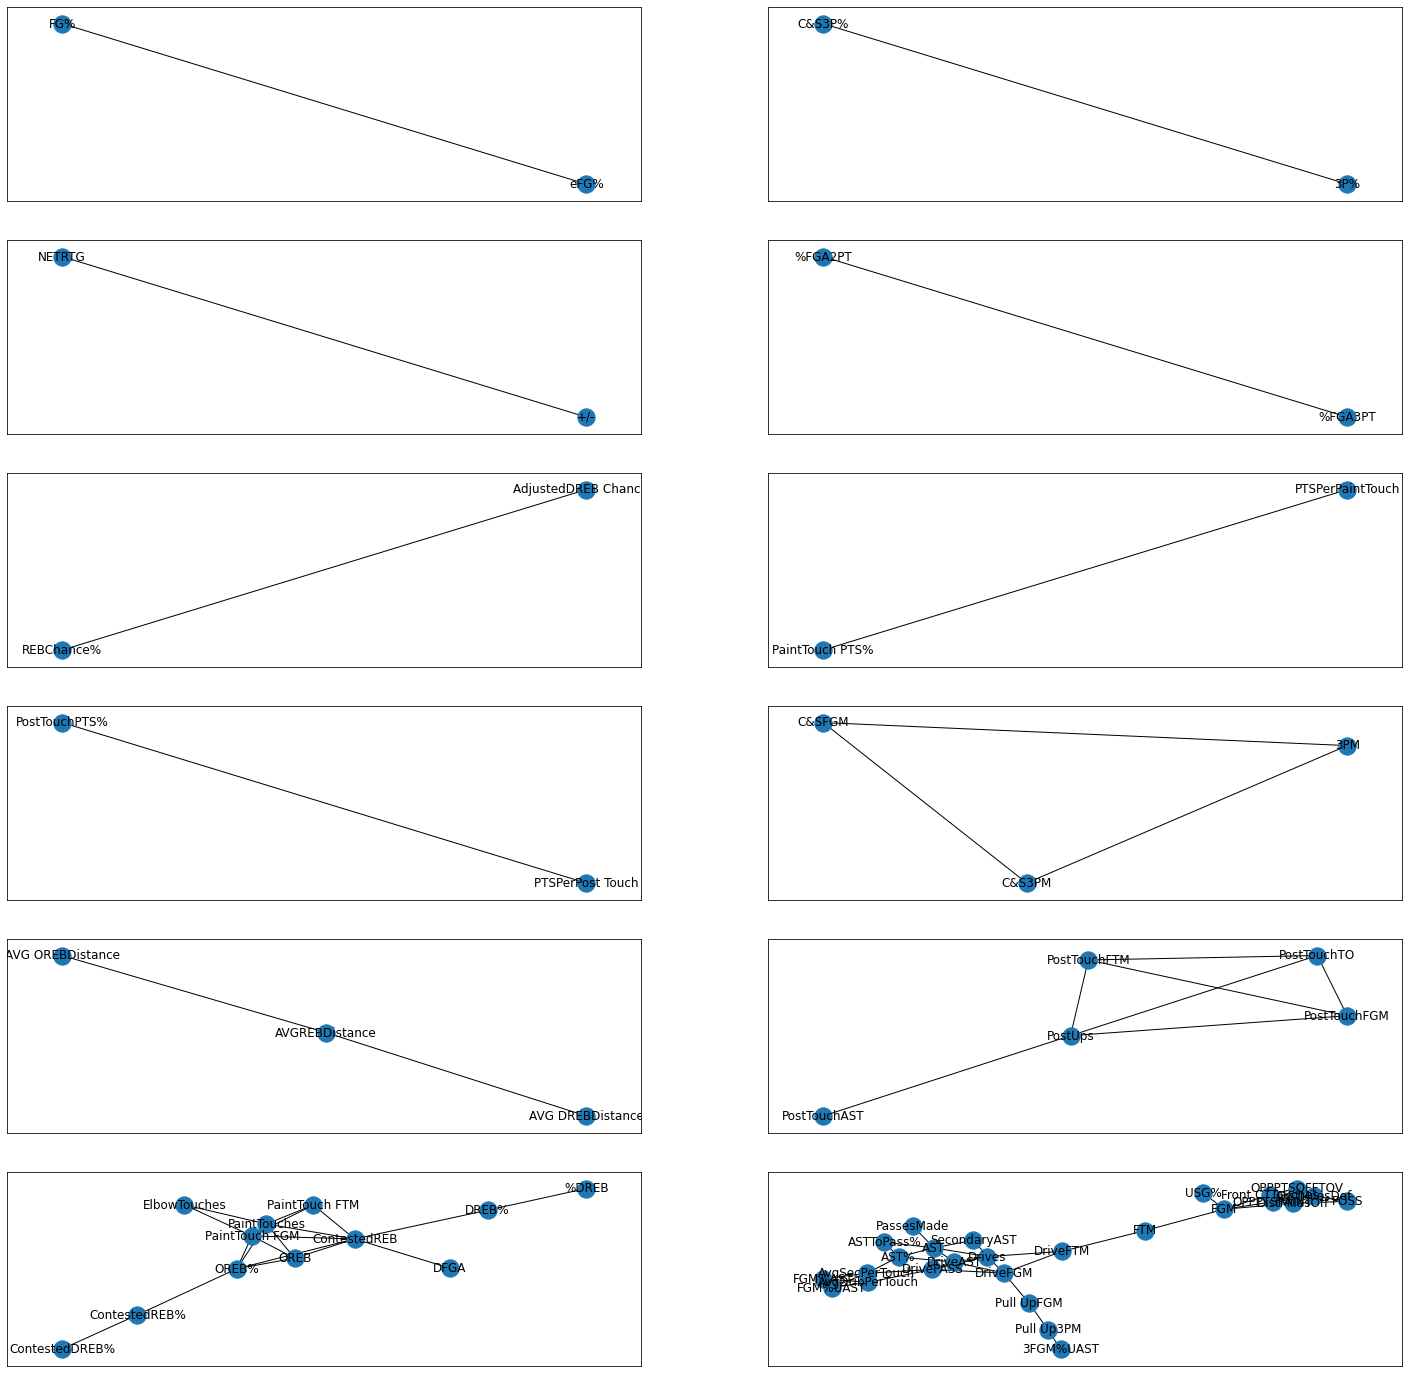

In [541]:
highCorrGraph(generalData)

In [542]:
generalData.drop(['eFG%','+/-','%FGA3PT','PTSPerPaintTouch','REBChance%','AVGREBDistance','PostTouchPTS%','C&S3PM','PostUps','ContestedREB%','OREB','ContestedREB','Drives','AST','AvgSecPerTouch','DistMilesOff','DistMilesDef','FGM','AST','ElbowTouches'],axis=1,inplace=True)

In [543]:
# generalData.drop(['FGM'],axis=1,inplace=True)

In [544]:
generalData.to_csv('./Data/Cleaned/AllData.csv')